# <span style="color:orange">Quality Data Analysis - Project Work [FULL PROJECT] </span>
## Team 40

### Course Details:
- Academic Year: 2023-2024

### Project Details:
- Title: QDA project: statistical process monitoring for additive manufacturing, phase 1 group 40

### Team Members:
- Daniele Andolfi
- Nicolas Atterrato
- Leonardo Avanzo
- Giovanni Callegaro

### Instructor:
- Prof.Colosimo

# Instructions
- This is a template notebook for the project work.
- Please fill in the details above (team members, instructor, etc.)
## PHASE 1 - Report structure
Please use the following sections for your project report:
- **Introduction** [max 3500 characters including spaces]
    - Recap the project work framework and objective
    - Briefly summarize the overall methodology you used to model and analyse your data
    - Briefly summarize the state-of-the-art you analysed to support your study (if any).
- **Assumptions and preliminary data analysis** [max 5000 characters including spaces]
    - Clearly state and motivate all the assumptions your proposed methodology relies on; present and discuss any preliminary data analysis and visualization you applied on the data.
- **Proposed methodology** [max 10000 characters including spaces]
    - Synthetically describe, motivate and critically discuss your proposed statistical process monitoring approach. 
- **Results** [max 10000 characters including spaces]
    - Synthetically presents and discuss the results of your statistical process monitoring design. 

## PHASE 2 - Report structure
Please use the following sections for your project report:
- **Preliminary data analysis** [max 5000 characters including spaces]
    - Synthetically describe and discuss any preliminary data analysis and visualization applied on the new dataset.
- **Test of your proposed approach on new data** [max 5000 characters including spaces]
    - Synthetically presents and discuss the results you got applying to the new data your previously designed statistical process monitoring approach.
- **Discussion** [max 5000 characters including spaces]
    - Critically discuss your results In this Section you can also propose possible ways to tune or revise your previously designed method to enhance its defect detection performance. 

You can add code cells to any of the above sections to show your code or display images. Each block of code should be accompanied by a brief description of what it does (not counted in characters limits).

## Submission
- Name your notebook as `teamXX.ipynb` where `XX` is your team number.
- Submit your notebook together with the Dataframe as a ZIP file on Webeep by the deadline. The ZIP file name must clearly state the "TEAM NUMBER".

# PHASE 1 ------------------------------

# Introduction

## Recap of project work framework and objective
The goal of this report is to provide a statistical process monitoring tool able to detect defects in the production of pieces crafted witthroughh additive manufacturing technology. Nowadays European manufacturing companies have quality as critical success factor and thanks to technological innovation and public investments in industry 4.0 they have lots of sensors useful to provide data. However, in order to create value from data, preprocessing and statistical analysis have to be performed so that control charts can be properly designed to detect failures. Control charts are a precious statistical process monitoring tool and they are valuated looking at how much they are good in finding production anomalies and how much they are good in not creating false alarm. The creation of a control chart is only the last step of the process so the quality of the instrument depends on the quality of raw data and on the hypothesis it is based on. In this phase we propose a control chart while in the second phase we will try to evaluate its behavior and propose some improvements.

## Briefly summarize the overall methodology you used to model and analyze your data
Firstly, data have been obtained in Made Competences 4.0 Lab. In the lab have been taken pictures of the 40 pieces divided into 10 images; thanks to a python function we transformed images into a dataset containing geometrical information about the pieces. Then we preprocessed data to have a dataset that could be used to provide a control chart instrument. In this phase it was crucial to pass from raw data to data ready to be analyzed according to instruments of Quality Data Analysis course. In order to do that we started analyzing photos to understand the connection between real objects and data; then we formulated different ways to approach the problem and selected the best one. After having a complete dataset we tried to design control charts starting from the simplest to the most complex approach. During the course we understood how hypothesis validation is fundamental to design control charts properly and that lots of problems in companies are caused by an improper design of the charts. So we tried to use our knowledge about the problem context to formulate the best possible models to describe the data. We think that model formulation is the most important part of this project. In fact nowadays sensors allow to have lots of data that can be autocorrelated and to have lots of covariates that could make more complex the analysis. While for the second problem the PCA instrument could be used (also in our case), for the first one finding a model has been really challenging: the cause of the problem was not the data order in time, but there were other issues related to images performance that we will discuss later on.

# Assumptions and preliminary data analysis
## Assumptions and preliminary data analysis

1. Hypothesis and images analysis 
First of all starting from images collection we supposed, looking at the way we observed collecting the data, that there was not correlation between the order the pieces have been analysed and the instant in which they had been produced. Moreover we supposed that pictures had not correlation with time instant and order they were taken. As said in the introduction, there are lots of time series cases where data can be described through ARIMA model since the result is influenced by the time instants data are collected, but this is not our case. The photos are often collected after more than 1 minute between each other: it is difficult to imagine that the second is correlated with the first one just because they are one after the other. In the context of additive manufacturing the pictures of the pieces to test could be taken also after one hour interval, but the control chart has to be based on valid models to be able to test correctly the pieces. Anyway, this does not imply that there is no correlation between and within the samples: models have to be found starting from observing the images and trying to find categorical or numerical characteristics in the dataset linked with strange patterns observed in photos.

    Looking at the photo is possible to observe that the data collected for each piece are really dependent from the perspective. In particular voids on the right are more visible for pieces on the left; voids on the bottom are more visible for pieces on the top, etc. This pattern can cause problems in observing data creating differences in quantitative geometrical features. There were two alternatives to solve this problem.
    The first one was trying to preprocess the data adjusting them to remove this difference. This is the most intuitive alternative, but it has some problems. Some of these differences are clear, for example the number and some characteristics of voids involved (small voids around the less visible part), but some others could not be detected because not visible looking at the photos. Moreover defining a thresholds to eliminate small voids could be dangerous: let’s suppose we notice that all the voids visible in all the pictures and in each piece have area greater than 30 pixels, then we cannot be sure that the next piece to test has not a void a little bit smaller (not enough to be significant as defect) with dimension 29 pixels or that it has a void generated because of the perspective with dimension 31 pixels. 
    The other alternative is not to remove anything and just observe this pattern remembering that data collected could be affected by it, trying to fit a model able to describe this diversity. Note that if some data are removed or transformed with the aim of remove these differences but failing then a model, even if with different parameters, would be present. 
    We decided to propose this second alternative avoiding elaborating raw data.

2. Data preprocessing
Now to define the final dataset to use we have to understand when we can say that a piece is defected. Looking at the pieces there are two types of defects: defects on the part and defects on the void. For example a piece could have a base with 90 degrees angles instead of smoothed ones, or it could have a big hole in the center and not a good dimension of voids. The first type of defects should be visible from the type “part” rows in the dataset while the second one should be visible from type “void” rows. Pieces have a lot of voids so the best solution would be to compare each void with the same type in all the pieces. However the ID in the dataset is not useful to univocally define voids and voids often have the same characteristics even if they are in a different position of the piece, so it’s impossible to order them from the data. Therefore to compare the same voids in different pieces is not possible, and we have to use more general characteristics referred to the distribution, not about the single voids. The mean can detect the case in which there is a void really bigger than the others (if there are not variation in others' features), but in case of a variation of the distribution with the same mean, then the standard deviation would be a better indicator. In general to be sure that the pieces have the same void distribution other metrics could be included like median, range interquartile or also trying to split the distribution in clusters so that similar ones are analyzed singularly could lead to increasing the performance of measures. In this phase we exclude defects with completely different void distribution so we have included only mean and standard deviation in the analysis. 
To sum up the final dataset has 40 rows with characteristics of the parts but also mean and standard deviation of all voids’ features.

In [177]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, levene
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import qda

# Import the dataset
data = pd.read_csv('image_statistics.csv')
# Print the first 5 rows of the dataset
data.head()

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels]
0,2024-03-26_09-38-35-502_MV540-H@xWyHvMbxwzDCYC...,top_left,part,0,39334,3979.892,0.145,-1.399,0.775,0.658,276.941,274.023,223.789
1,2024-03-26_09-38-35-502_MV540-H@xWyHvMbxwzDCYC...,top_left,void,1,94,37.556,0.773,1.445,0.949,0.696,14.463,9.178,10.940
2,2024-03-26_09-38-35-502_MV540-H@xWyHvMbxwzDCYC...,top_left,void,2,95,46.142,0.935,-1.466,0.872,0.565,19.647,6.959,10.998
3,2024-03-26_09-38-35-502_MV540-H@xWyHvMbxwzDCYC...,top_left,void,3,239,77.527,0.942,-1.432,0.909,0.569,31.984,10.699,17.444
4,2024-03-26_09-38-35-502_MV540-H@xWyHvMbxwzDCYC...,top_left,void,4,195,61.420,0.885,1.545,0.907,0.577,24.535,11.419,15.757


In [178]:
#divide the dataset

part_dataset = data[data['Region type'] == 'part']
void_dataset = data[data['Region type'] == 'void']
#data cleaning

void_dataset_filtered = void_dataset[void_dataset['Area [pixels]'] >= 0]

In [179]:
# Calculate mean and std for each piece

stats_df = void_dataset_filtered.groupby(['Image name', 'Position']).agg(
    area_mean=('Area [pixels]', 'mean'),
    area_std=('Area [pixels]', 'std'),
    eccentricity_mean=('Eccentricity', 'mean'),
    eccentricity_std=('Eccentricity', 'std'),
    solidity_mean=('Solidity', 'mean'),
    solidity_std=('Solidity', 'std'),
    perimeter_mean=('Perimeter [pixels]','mean'),
    perimeter_std=('Perimeter [pixels]','std'),
    extent_mean=('Extent','mean'),
    extent_std=('Extent','std'),
    major_axis_length_mean=('Major Axis Length [pixels]','mean'),
    major_axis_length_std=('Major Axis Length [pixels]','std'),
    minor_axis_length_mean=('Minor Axis Length [pixels]','mean'),
    minor_axis_length_std=('Minor Axis Length [pixels]','std'),
    equivalent_diameter_mean=('Equivalent Diameter [pixels]','mean'),
    equivalent_diameter_std=('Equivalent Diameter [pixels]','std')
).reset_index()

# Merge the statistics with the first dataset
merged_df = pd.merge(part_dataset, stats_df, on=['Image name', 'Position'], how='left')



# Proposed methodology

Starting from the dataset described in the previous section we defined a strategy to create the control chart. First of all the dataset has a lot of columns. The python function that has converted images has provided a lot of information about the pieces. Having multiple information is useful to detect variability, but it increases complexity of the analysis. In our case there is not a target column, so we need an instrument to understand which feature are more relevant to explain variability and use less random variables to create a multivariate control chart. In fact including all columns would create a less effective control chart. In order to solve this problem the most useful statistical instrument is the Principal Component Analysis. The objective of the usage is to create new uncorrelated variables as linear combination of the original ones looking at the data with a different perspective. Our dataset had columns very different in terms of scale so we decided to perform standardization to avoid giving more importance to features with a higher scale. Principal components explain variability with a certain percentage. We decided to select the first three components (numerical reasons will be presented in “results” section), obviously the problem of this choice is a loss in terms of interpretability of the results, but we preferred to analyze original data anti-transforming scores thanks to loadings but having great results in percentage of explained variability. In this phase of feature selection we also computed a correlation matrix, observing that the PCA was totally justified since lots of the geometrical features provided by the function were correlated, especially the ones related to voids. Means of different characteristics were very positively correlated each other, so it is difficult to observe a piece with a high mean area of voids but a small one in terms of perimeter or major axis length. This happens because of voids’ shape which is quite regular (voids are close to triangles) not like the part one, so features are basically divided into dimension ones (area, perimeter, major axis length..) and the ones referred to shape (eccentricity, solidity..). In part this is not true because the shape is very particular so it could have small area with a huge perimeter.
After this analysis we have basically reduced the dataset in 40 rows and 3 columns, one per each principal component. Before starting to create control charts we have performed Shapiro-Wilk and QQ-plot test on the three components. The aim of checking normality in principal components is to verify the hypothesis for the control chart design. 

Using normal data box-cox or other type of transformation were not needed, however during image analysis we had notice some patterns that we could not ignore. As said in the previous section, we noticed how values of geometrical features were influenced by the perspective and this disturb is projected mathematically also in the principal components, which are linear combinations of the previous ones. The perspective problem is caused by two elements: the first one is the position of the piece in the photo. This information is collected in the original column “position”, but obviously it has not been included in PCA like the other categorical variables. The second elements that influences perspective is the position of the pieces respect to the tray, which is different in each photo (same left bottom pieces could be in different position on the tray). This information is not provided in the dataset. Considering these reasons and deciding to consider a sample for each image so that n=4 and m=10 (according to QDA course notation) there are two possible type of data correlation: the one caused by the first element is correlation within the sample, while the one cause by the second element is correlation between the samples. Given the context described we decided to visualize the data to verify whether the hypothesis formulated starting from images where visible also in numerical features. To provide this information, we proposed a scatter plot of each principal components with both images and positions on the x axis.

Looking at the graphs we noticed that our hypothesis were confirmed. The first principal component is not influenced by the position of the piece respect to the tray: data are uniformly distributed without any differences among images indexes in the scatterplot, while we can see a clear trend in which first principal component is smaller for right pieces and higher for the ones on the left. The second principal component shows the complete opposite pattern. In the first graph we can see how it is very dependent from the image index while there are not relevant characteristics regarding the position of the pieces. Looking at the graph of the second principal components with piece position on x axis there are some differences in term of variability, but they are caused by the fact that pieces in the same position are in different images. The third components has a pattern similar to the first one because it looks like it has not correlation between the samples, but the scores seem to be influenced by the piece position only for pieces on the top right without a clear distinction between right and left pieces. 
Having used principal components instead of row data we have lost interpretability in the results so we need to anti-transform scores to understand which geometrical features are affected by the different type of perspective error. This analysis can be easily performed looking at the loadings of the components. The first component is influenced by voids’ characteristics and minor and major axis length of the part. The second component is more dependent on features of the part like area or perimeter, while in the third the trend is similar to the first one with some differences in specific characteristics. 
To sum up it is difficult interpret these results univocally having a lot of columns in the original dataset but we can say that the perspective caused by piece position impacts more on voids’ features while the one caused by the position respect to tray impacts more on parts’ features. Although these patterns are clear from the graphs, it is necessary to provide quantitative analysis to confirm hypothesis and design correctly the control chart. 

Firstly, we assumed no real patterns in data. Using this approach and trying to fit a control chart for each principal component we expected hugging for the first and the third components having correlation within the sample and stratification for the second component because of correlation between the samples. Plotting the control charts assuming i.i.d. we can observe exactly this behavior. We decided first of all to compute the standard deviation as if the samples were individual observations, because using that formula i.i.d. hypothesis is not needed and control limits increase in case of correlation between samples and decrease in case of correlation within samples solving respectively stratification and hugging problem. In this way out of controls of the second component and observations close to central limit of first and third components disappear, but the risk is not to be able to detect future defects in the test pieces because of too large limit ranges. 

At this point we had three different solutions to solve the problem: batching, gapping and linear modelling. Having only 10 samples we avoided batching and gapping not to loose more information and especially because thanks to image analysis and scatterplots we had already found out the cause of the correlation. Therefore we fitted linear regression models using position as dummy variable for the first and third component obtaining satisfying results in term of p-value, so we assumed the models to be statistically significant. Obviously the model is not the same for the two components, in fact the first has two dummy variables: one equal to one in case of pieces in the bottom right position and the other equal to one in case of top right position, while there is not evidence to distinguish top left and bottom left. The third component has one dummy variable to distinguish top right pieces.
The real problem has been the design of a model for the second component. We know that images are different one from the other, but there is not a categorical or numerical variable defining the position of the piece respect to the tray. We know the time instants in which photos have been taken, but according to the initial hypothesis it is not correct use time for the model so we decided to simply use the control limits given by the computation of standard deviation considering individual samples.

The last decision deals with the design of the multivariate control chart. There are two solutions: design a control chart for each component or design a control chart using a multivariate distribution. The second one should be the best, but in our case we are dealing with no i.i.d. data and for one of the components it is impossible to fit a linear model. Additionally we are already using principal components, so elaborating again the data could create even more problems in terms of interpretability when an alarm occurs. Therefore we chose to design three different control charts. The main problem of this solution is the increase in false alarms given by the presence of three different alphas. However, in this context Bonferroni inequality is not needed since principal components are uncorrelated by construction, so the increase in fals alarms is only given by the binomial law effect.

To sum up we obtained three different control charts: one for each component. We solved correlation between samples using standard deviation formula considering individual observation for samples and we solved correlation within samples fitting a model based on pieces position and obtaining special control charts for residuals given by the model.

In [180]:
# Select the features for PCA (excluding non-numeric columns like 'Image name' and 'Position')
features = merged_df.drop(['Image name', 'Position','ID','Region type'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca.fit(scaled_features)

# Transform the data onto the new PCA space
pca_data = pca.transform(scaled_features)

# You can now use pca_data for further analysis or visualization

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Access the loadings (eigenvectors)
loadings = pca.components_

# Print the loadings for each principal component
for i, loading in enumerate(loadings):
    print(f"Loadings for Principal Component {i+1}:")
    print(loading)



Principal Component 1: 0.3976
Principal Component 2: 0.2892
Principal Component 3: 0.1458
Principal Component 4: 0.0510
Principal Component 5: 0.0367
Principal Component 6: 0.0295
Principal Component 7: 0.0154
Principal Component 8: 0.0133
Principal Component 9: 0.0065
Principal Component 10: 0.0063
Principal Component 11: 0.0039
Principal Component 12: 0.0026
Principal Component 13: 0.0008
Principal Component 14: 0.0006
Principal Component 15: 0.0004
Principal Component 16: 0.0002
Principal Component 17: 0.0001
Principal Component 18: 0.0001
Principal Component 19: 0.0001
Principal Component 20: 0.0000
Principal Component 21: 0.0000
Principal Component 22: 0.0000
Principal Component 23: 0.0000
Principal Component 24: 0.0000
Principal Component 25: 0.0000
Loadings for Principal Component 1:
[-0.0236  0.0462 -0.0169 -0.0994 -0.097  -0.0173  0.214   0.1947 -0.0237
  0.2824 -0.1751 -0.1222  0.001   0.1755 -0.2106  0.3028 -0.2722 -0.0908
 -0.2072  0.2871 -0.2502  0.3123 -0.2465  0.3086 -0.

Correlation Matrix:
                              Area [pixels]  Perimeter [pixels]  Eccentricity  \
Area [pixels]                        1.0000             -0.9512        0.6442   
Perimeter [pixels]                  -0.9512              1.0000       -0.7216   
Eccentricity                         0.6442             -0.7216        1.0000   
Orientation [radians]               -0.1525              0.1111        0.0079   
Solidity                             0.9441             -0.9584        0.6140   
Extent                               0.2217             -0.2148       -0.0847   
Major Axis Length [pixels]          -0.2816              0.3838        0.0144   
Minor Axis Length [pixels]          -0.6009              0.7241       -0.5308   
Equivalent Diameter [pixels]         1.0000             -0.9515        0.6448   
area_mean                           -0.4122              0.4342       -0.1507   
area_std                            -0.7296              0.6914       -0.5298   
eccentri

<AxesSubplot:>

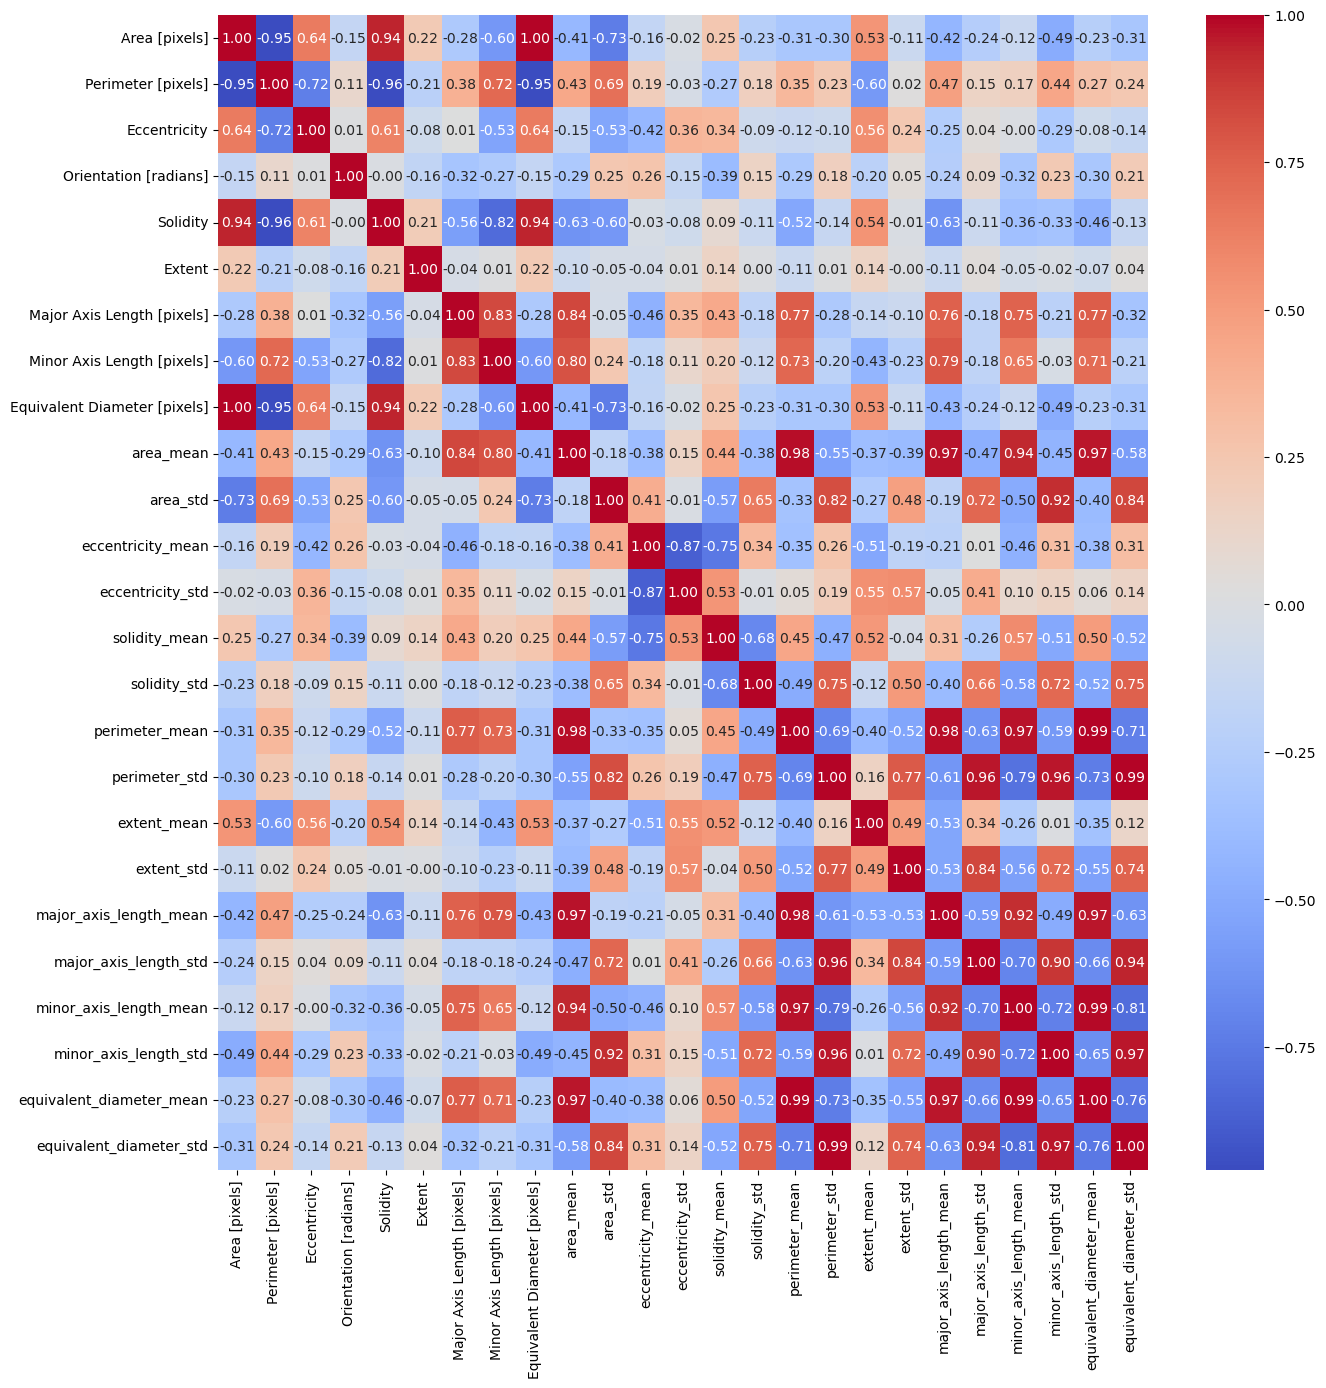

In [181]:
# Assuming your dataset is named 'dataset'
correlation_matrix = features.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

import seaborn as sns
plt.figure(figsize=(15, 15))  # Adjust width and height as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


p-value of the Shapiro-Wilk test: 0.995


c:\Users\gioca\anaconda3\envs\QDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


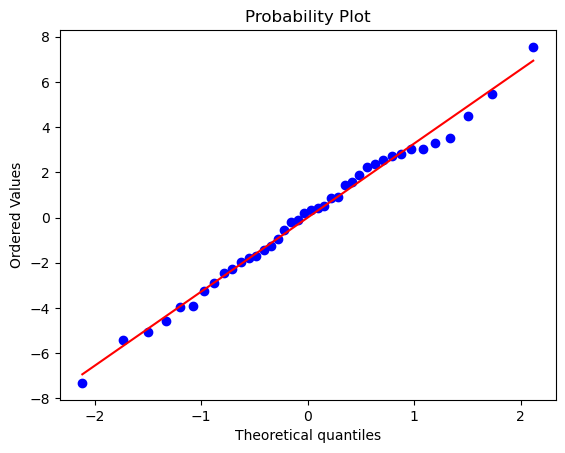

In [182]:
pca_first_component = pca.transform(scaled_features)[:, 0]  # Extract the first principal component

# Add the first principal component as a new column to the original dataset
part_dataset['First Principal Component'] = pca_first_component

# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(pca_first_component)
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(pca_first_component, dist="norm", plot=plt)
plt.show()

merged_df['first_principal_component'] = pca_first_component

c:\Users\gioca\anaconda3\envs\QDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


p-value of the Shapiro-Wilk test: 0.461


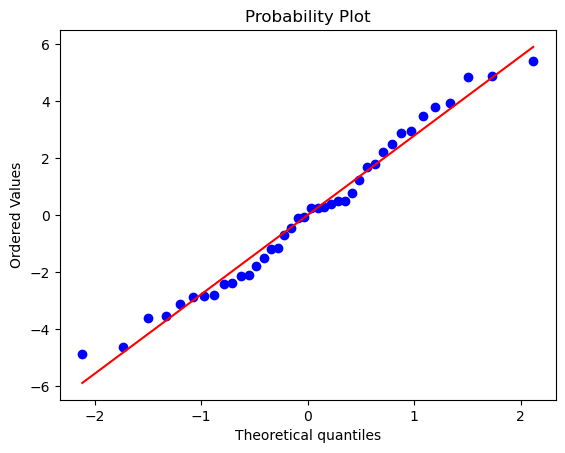

In [183]:
pca_second_component = pca.transform(scaled_features)[:, 1]  # Extract the second principal component


# Add the first principal component as a new column to the original dataset
part_dataset['Second Principal Component'] = pca_second_component

# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(pca_second_component)
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(pca_second_component, dist="norm", plot=plt)
plt.show()

merged_df['second_principal_component'] = pca_second_component

p-value of the Shapiro-Wilk test: 0.694


c:\Users\gioca\anaconda3\envs\QDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


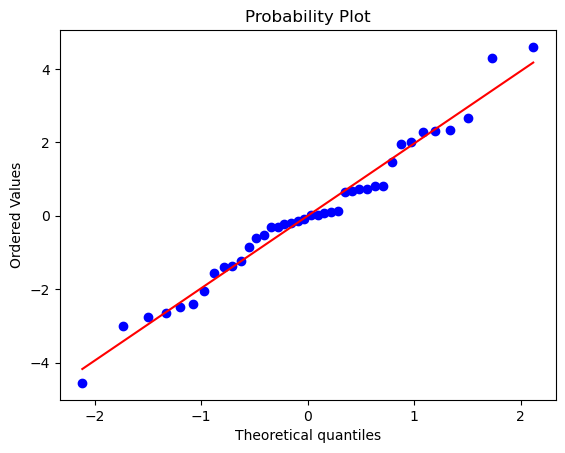

In [184]:
pca_third_component = pca.transform(scaled_features)[:, 2]  # Extract the third principal component


# Add the first principal component as a new column to the original dataset
part_dataset['Third Principal Component'] = pca_third_component

# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(pca_third_component)
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(pca_third_component, dist="norm", plot=plt)
plt.show()

merged_df['third_principal_component'] = pca_third_component

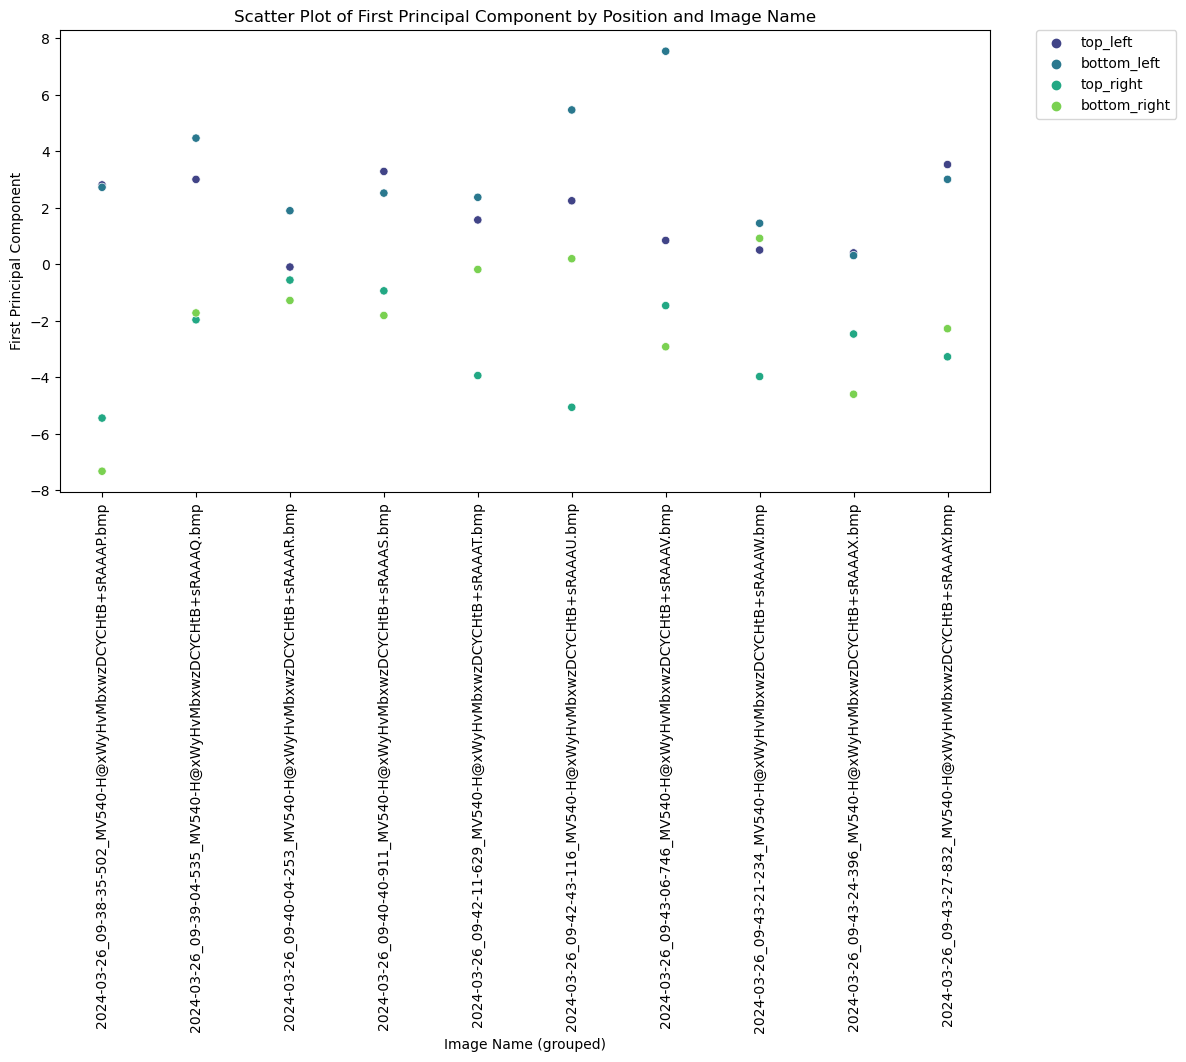

In [185]:
# Assign a unique x-coordinate for each image_name
merged_df['x_coordinate'] = merged_df.groupby('Image name').ngroup()

# Plot the first principal component with different colors for different positions
plt.figure(figsize=(12, 6))
sns.scatterplot(x='x_coordinate', y='first_principal_component', hue='Position', data=merged_df, palette='viridis')

# Set plot labels and title
plt.xlabel('Image Name (grouped)')
plt.ylabel('First Principal Component')
plt.title('Scatter Plot of First Principal Component by Position and Image Name')

# Customize x-ticks to show image names
plt.xticks(ticks=range(merged_df['x_coordinate'].nunique()), labels=merged_df['Image name'].unique(), rotation=90)

# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

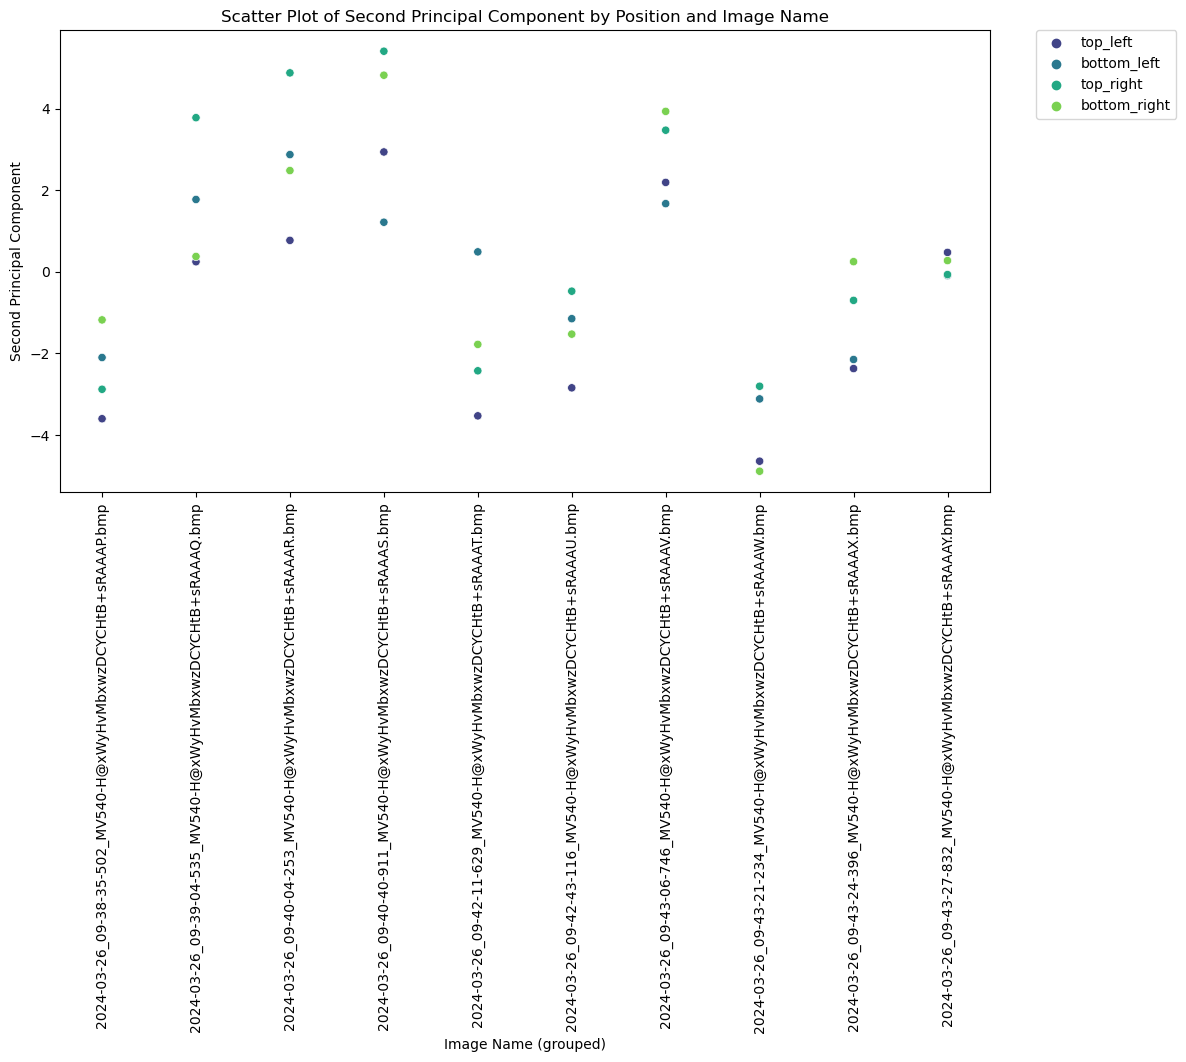

In [186]:
# Assign a unique x-coordinate for each image_name
merged_df['x_coordinate'] = merged_df.groupby('Image name').ngroup()

# Plot the second principal component with different colors for different positions
plt.figure(figsize=(12, 6))
sns.scatterplot(x='x_coordinate', y='second_principal_component', hue='Position', data=merged_df, palette='viridis')

# Set plot labels and title
plt.xlabel('Image Name (grouped)')
plt.ylabel('Second Principal Component')
plt.title('Scatter Plot of Second Principal Component by Position and Image Name')

# Customize x-ticks to show image names
plt.xticks(ticks=range(merged_df['x_coordinate'].nunique()), labels=merged_df['Image name'].unique(), rotation=90)

# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

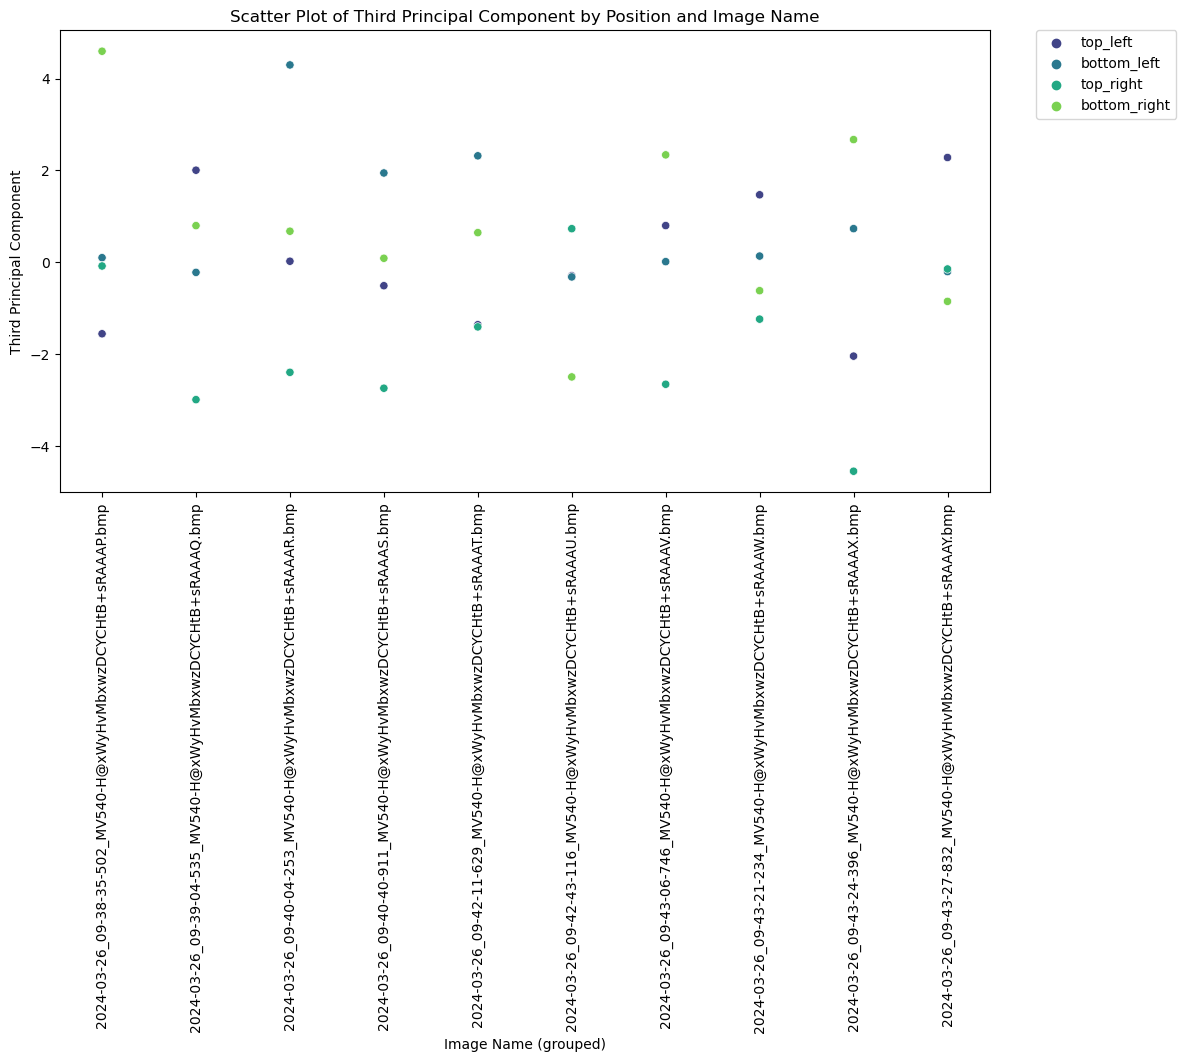

In [187]:
# Assign a unique x-coordinate for each image_name
merged_df['x_coordinate'] = merged_df.groupby('Image name').ngroup()

# Plot the second principal component with different colors for different positions
plt.figure(figsize=(12, 6))
sns.scatterplot(x='x_coordinate', y='third_principal_component', hue='Position', data=merged_df, palette='viridis')

# Set plot labels and title
plt.xlabel('Image Name (grouped)')
plt.ylabel('Third Principal Component')
plt.title('Scatter Plot of Third Principal Component by Position and Image Name')

# Customize x-ticks to show image names
plt.xticks(ticks=range(merged_df['x_coordinate'].nunique()), labels=merged_df['Image name'].unique(), rotation=90)

# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

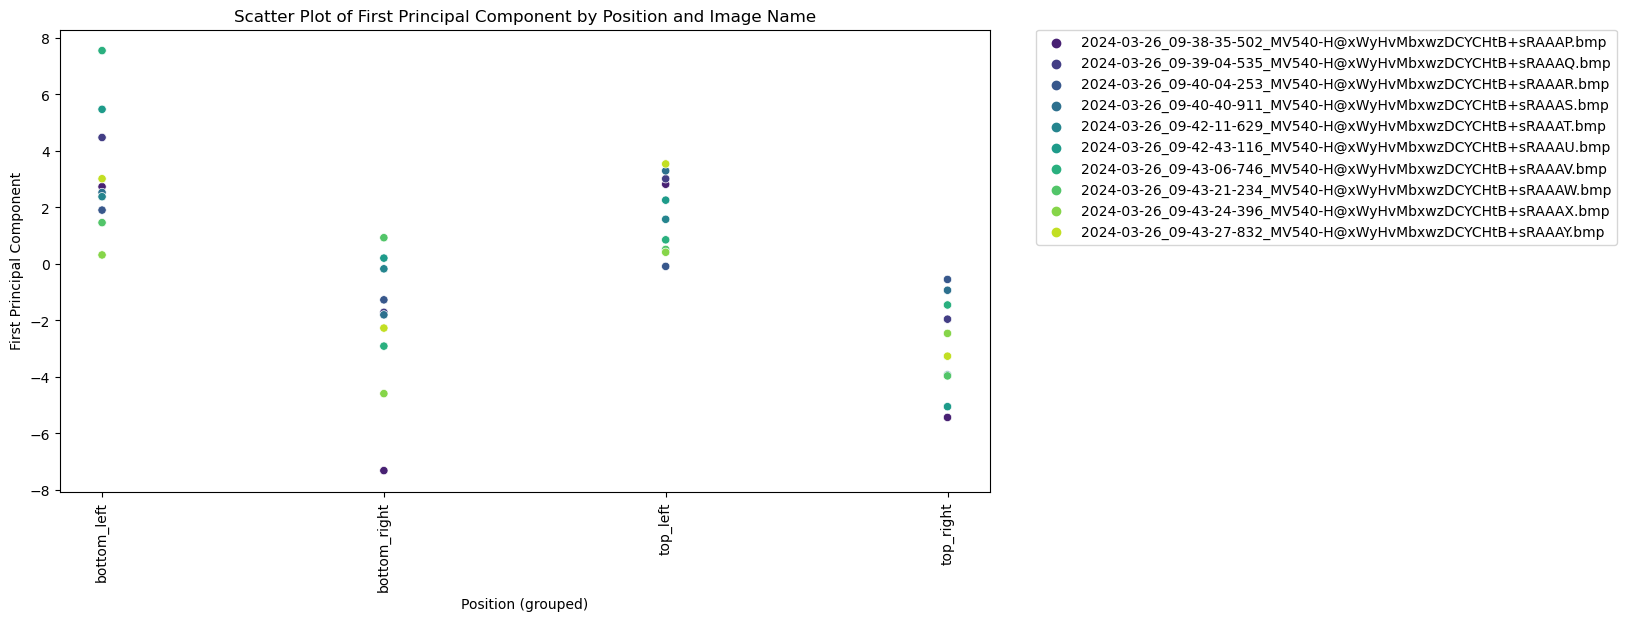

In [188]:
# Assign a unique x-coordinate for each position
merged_df['x_coordinate'] = merged_df.groupby('Position').ngroup()
positions = merged_df['Position']
# Plot the first principal component with different colors for different image names
plt.figure(figsize=(12, 6))
sns.scatterplot(x='x_coordinate', y='first_principal_component', hue='Image name', data=merged_df, palette='viridis')

# Set plot labels and title
plt.xlabel('Position (grouped)')
plt.ylabel('First Principal Component')
plt.title('Scatter Plot of First Principal Component by Position and Image Name')

desired_order=['bottom_left', 'bottom_right', 'top_left', 'top_right']
plt.xticks(ticks=range(len(desired_order)), labels=desired_order, rotation=90)
# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

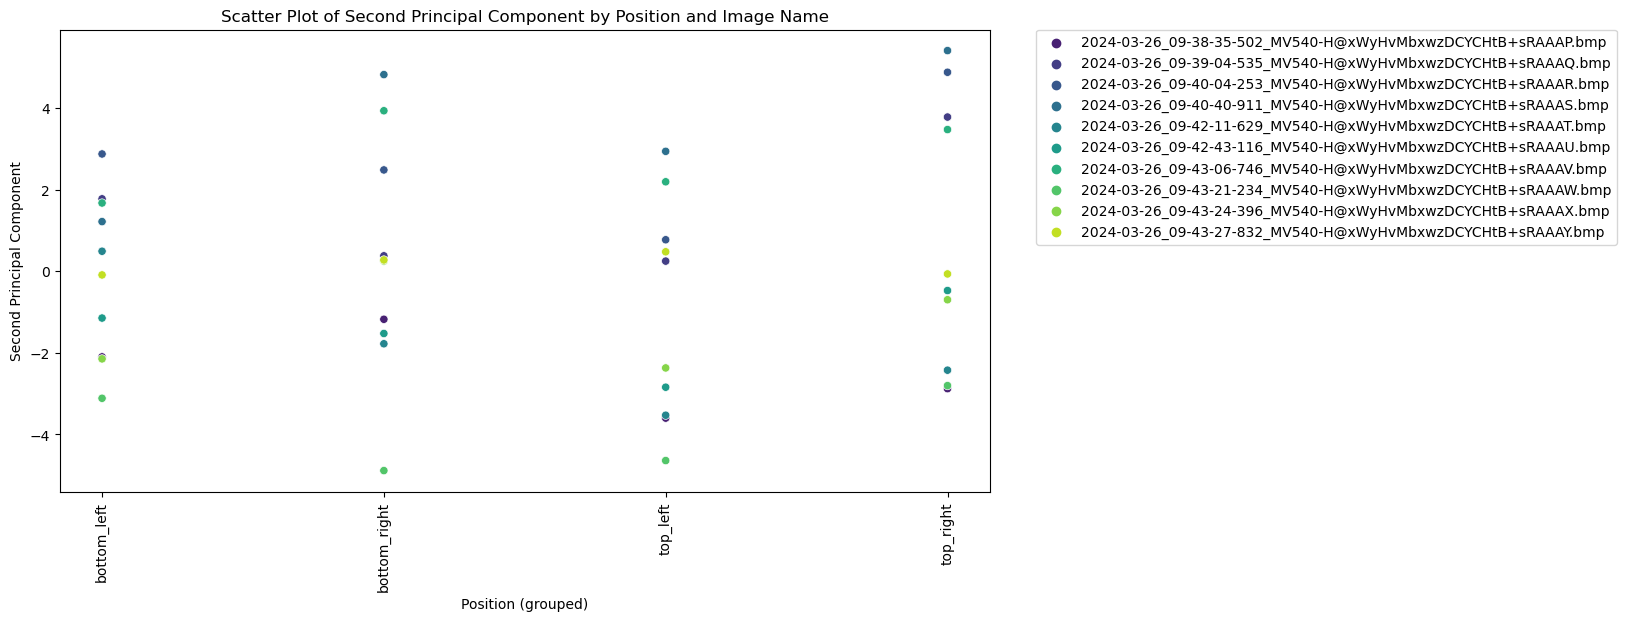

In [189]:
# Assign a unique x-coordinate for each position
merged_df['x_coordinate'] = merged_df.groupby('Position').ngroup()
positions = merged_df['Position']
# Plot the first principal component with different colors for different image names
plt.figure(figsize=(12, 6))
sns.scatterplot(x='x_coordinate', y='second_principal_component', hue='Image name', data=merged_df, palette='viridis')

# Set plot labels and title
plt.xlabel('Position (grouped)')
plt.ylabel('Second Principal Component')
plt.title('Scatter Plot of Second Principal Component by Position and Image Name')


desired_order=['bottom_left', 'bottom_right', 'top_left', 'top_right']
plt.xticks(ticks=range(len(desired_order)), labels=desired_order, rotation=90)
# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

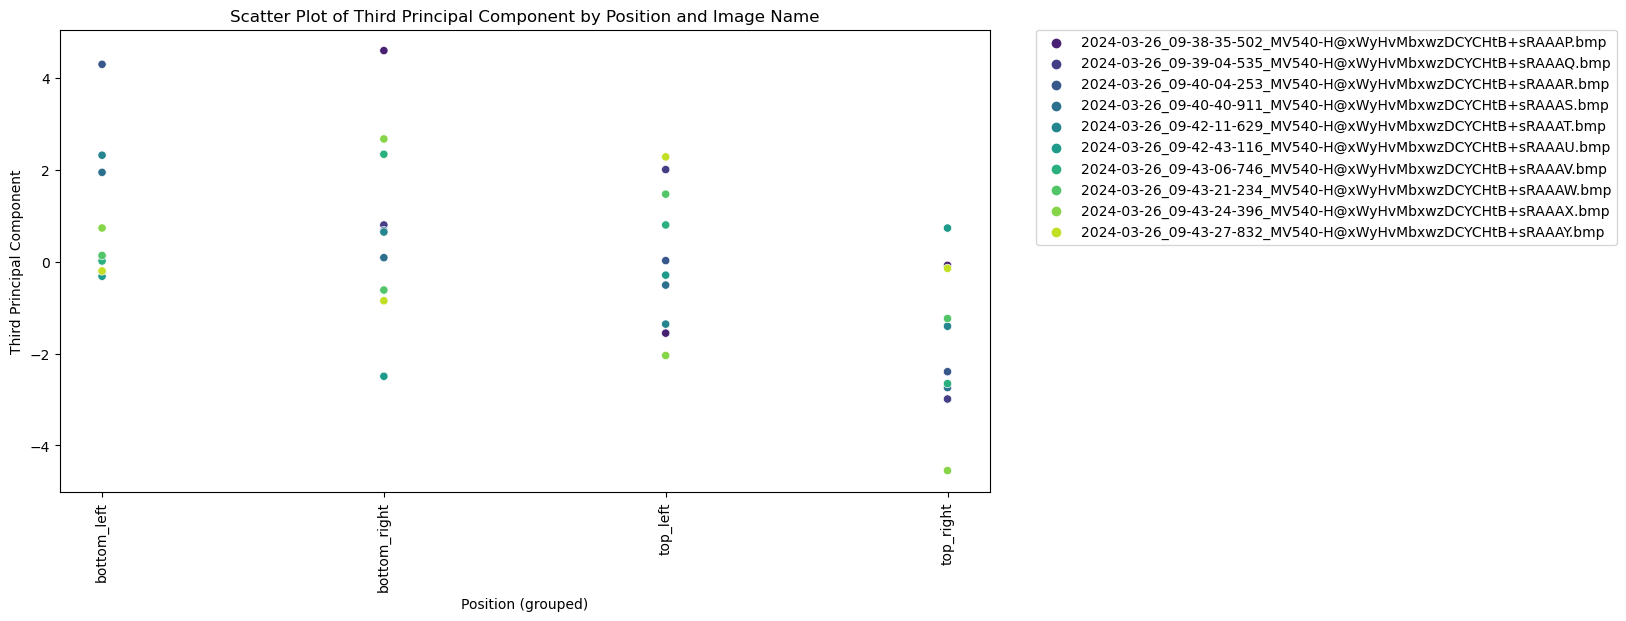

In [190]:
# Assign a unique x-coordinate for each position
merged_df['x_coordinate'] = merged_df.groupby('Position').ngroup()
positions = merged_df['Position']
# Plot the first principal component with different colors for different image names
plt.figure(figsize=(12, 6))
sns.scatterplot(x='x_coordinate', y='third_principal_component', hue='Image name', data=merged_df, palette='viridis')

# Set plot labels and title
plt.xlabel('Position (grouped)')
plt.ylabel('Third Principal Component')
plt.title('Scatter Plot of Third Principal Component by Position and Image Name')


desired_order=['bottom_left', 'bottom_right', 'top_left', 'top_right']
plt.xticks(ticks=range(len(desired_order)), labels=desired_order, rotation=90)
# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

In [191]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'merged_df' is your DataFrame and 'Position' is the column with position data
# Combine 'top_right' and 'top_left' into 'top'
# Combine 'bottom_right' and 'bottom_left' into 'bottom'
merged_df['Position_combined'] = merged_df['Position'].replace({'top_right': 'top', 'top_left': 'top', 'bottom_right': 'bottom', 'bottom_left': 'bottom'})

# Create dummy variables for the combined positions
merged_df['Dummy_top'] = np.where(merged_df['Position_combined'] == 'top', 1, 0)
merged_df['Dummy_bottom'] = np.where(merged_df['Position_combined'] == 'bottom', 1, 0)

# Define the independent variables (X) and the dependent variable (y)
# Here we only use one dummy variable ('Dummy_bottom') to avoid multicollinearity
x = merged_df[['Dummy_bottom']]
x = sm.add_constant(x)
y = merged_df['first_principal_component']

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Print the summary of the regression results
qda.summary(model)


REGRESSION EQUATION
-------------------
first_principal_component =  -0.543 const + 1.086 Dummy_bottom

COEFFICIENTS
------------
        Term    Coef  SE Coef  T-Value  P-Value
       const -0.5431   0.7124  -0.7624   0.4505
Dummy_bottom  1.0863   1.0075   1.0782   0.2878

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
3.1861 0.0297     0.0041

ANALYSIS OF VARIANCE
---------------------
      Source   DF   Adj SS  Adj MS  F-Value  P-Value
  Regression  1.0  11.8002 11.8002   1.1624   0.2878
       const  1.0   5.9001  5.9001   0.5812   0.4505
Dummy_bottom  1.0  11.8002 11.8002   1.1624   0.2878
       Error 38.0 385.7527 10.1514      NaN      NaN
       Total 39.0 397.5530     NaN      NaN      NaN


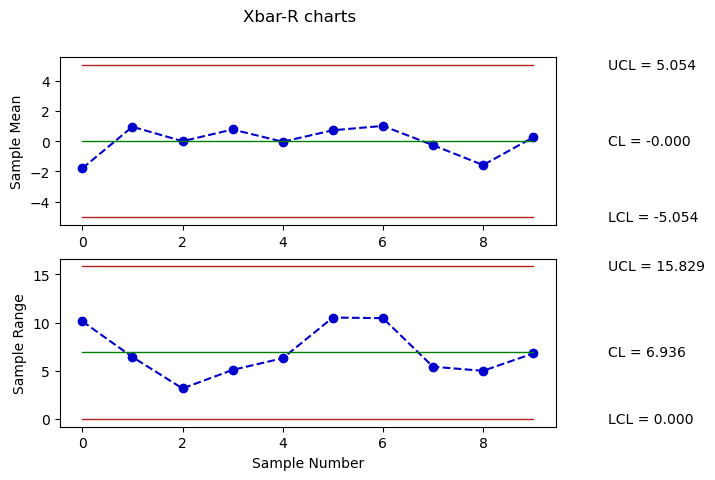

In [192]:
# Filter data for each position
first_position = merged_df[merged_df['Position'] == 'bottom_left']['first_principal_component']
second_position = merged_df[merged_df['Position'] == 'bottom_right']['first_principal_component']
third_position = merged_df[merged_df['Position'] == 'top_left']['first_principal_component']
fourth_position = merged_df[merged_df['Position'] == 'top_right']['first_principal_component']

# Create a new DataFrame with 10 rows and 4 columns
new_df = pd.DataFrame({
    'First Position': first_position.reset_index(drop=True).iloc[:10],
    'Second Position': second_position.reset_index(drop=True).iloc[:10],
    'Third Position': third_position.reset_index(drop=True).iloc[:10],
    'Fourth Position': fourth_position.reset_index(drop=True).iloc[:10]
})
cartaprova=qda.ControlCharts.XbarR(new_df)

REGRESSION EQUATION
-------------------
first_principal_component =  + 3.181 const -6.083 Dummy_top_right -5.275 Dummy_bottom_right -1.365 Dummy_top_left

COEFFICIENTS
------------
              Term    Coef  SE Coef  T-Value    P-Value
             const  3.1806   0.6131   5.1880 8.4488e-06
   Dummy_top_right -6.0830   0.8670  -7.0160 3.1276e-08
Dummy_bottom_right -5.2749   0.8670  -6.0840 5.3673e-07
    Dummy_top_left -1.3645   0.8670  -1.5738 1.2428e-01

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
1.9387 0.6596     0.6313

ANALYSIS OF VARIANCE
---------------------
            Source   DF   Adj SS   Adj MS  F-Value    P-Value
        Regression  3.0 262.2451  87.4150  23.2576 1.5105e-08
             const  1.0 101.1628 101.1628  26.9154 8.4488e-06
   Dummy_top_right  1.0 185.0141 185.0141  49.2248 3.1276e-08
Dummy_bottom_right  1.0 139.1245 139.1245  37.0154 5.3673e-07
    Dummy_top_left  1.0   9.3095   9.3095   2.4769 1.2428e-01
             Error 36.0 135.3079   3.7586   

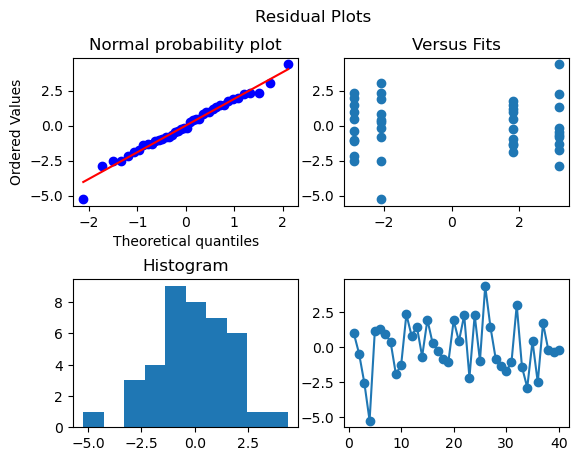

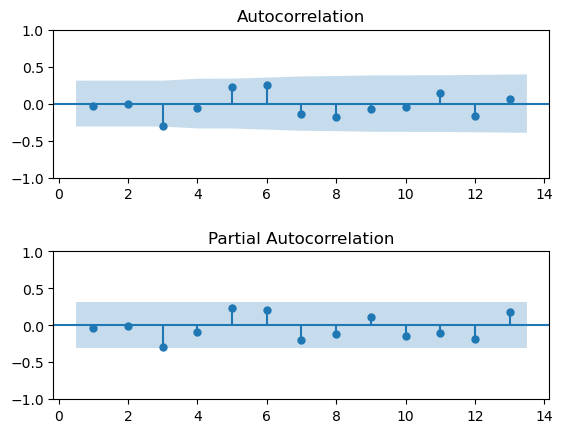

In [193]:
import statsmodels.api as sm
import qda

#create a vectors for dummy variables associated to each batch
merged_df['Dummy_top_right'] = np.where(merged_df['Position']=='top_right', 1, 0)
merged_df['Dummy_top_left'] = np.where(merged_df['Position']=='top_left', 1, 0)
merged_df['Dummy_bottom_right'] = np.where(merged_df['Position']=='bottom_right', 1, 0)
merged_df['Dummy_bottom_left'] = np.where(merged_df['Position']=='bottom_left', 1, 0)
x = merged_df[['Dummy_top_right', 'Dummy_bottom_right','Dummy_top_left']]
x = sm.add_constant(x)
y = merged_df['first_principal_component']
model = sm.OLS(y, x).fit()
qda.summary(model)

pca_first_component_res = np.array(model.resid)

import statsmodels.graphics.tsaplots as sgt
from statsmodels.sandbox.stats.runs import runstest_1samp
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)
_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(merged_df)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid, lags = int(len(merged_df)/3), zero=False, ax=ax[1],
method = 'ywm')
plt.show()

REGRESSION EQUATION
-------------------
first_principal_component =  + 2.498 const -5.401 Dummy_top_right -4.593 Dummy_bottom_right

COEFFICIENTS
------------
              Term    Coef  SE Coef  T-Value    P-Value
             const  2.4984   0.4421   5.6514 1.8622e-06
   Dummy_top_right -5.4007   0.7657  -7.0534 2.4067e-08
Dummy_bottom_right -4.5927   0.7657  -5.9981 6.3168e-07

MODEL SUMMARY
-------------
    S   R-sq  R-sq(adj)
1.977 0.6362     0.6166

ANALYSIS OF VARIANCE
---------------------
            Source   DF   Adj SS   Adj MS  F-Value    P-Value
        Regression  2.0 252.9356 126.4678  32.3565 7.5036e-09
             const  1.0 124.8354 124.8354  31.9388 1.8622e-06
   Dummy_top_right  1.0 194.4532 194.4532  49.7504 2.4067e-08
Dummy_bottom_right  1.0 140.6177 140.6177  35.9767 6.3168e-07
             Error 37.0 144.6174   3.9086      NaN        NaN
             Total 39.0 397.5530      NaN      NaN        NaN
Shapiro-Wilk test p-value on the residuals = 0.784
Runs test p

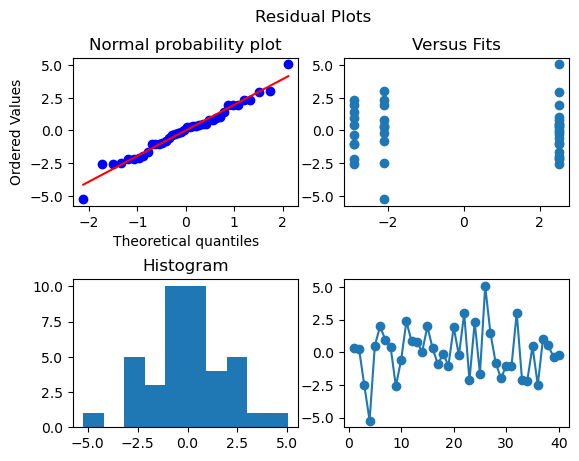

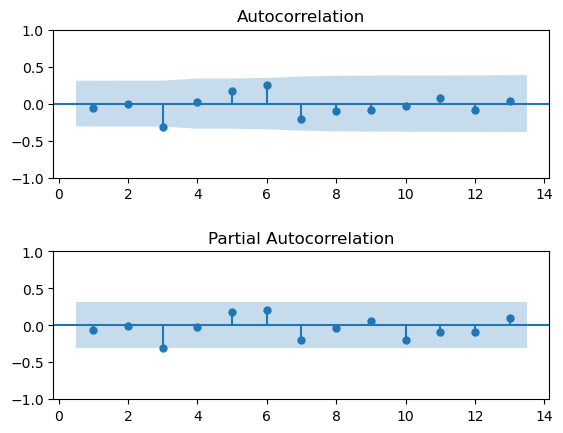

In [194]:
import statsmodels.api as sm
import qda

#create a vectors for dummy variables associated to each batch
merged_df['Dummy_top_right'] = np.where(merged_df['Position']=='top_right', 1, 0)
merged_df['Dummy_top_left'] = np.where(merged_df['Position']=='top_left', 1, 0)
merged_df['Dummy_bottom_right'] = np.where(merged_df['Position']=='bottom_right', 1, 0)
merged_df['Dummy_bottom_left'] = np.where(merged_df['Position']=='bottom_left', 1, 0)
x = merged_df[['Dummy_top_right', 'Dummy_bottom_right']]
x = sm.add_constant(x)
y = merged_df['first_principal_component']
model = sm.OLS(y, x).fit()
qda.summary(model)

pca_first_component_res = np.array(model.resid)

import statsmodels.graphics.tsaplots as sgt
from statsmodels.sandbox.stats.runs import runstest_1samp
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)
_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(merged_df)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid, lags = int(len(merged_df)/3), zero=False, ax=ax[1],
method = 'ywm')
plt.show()

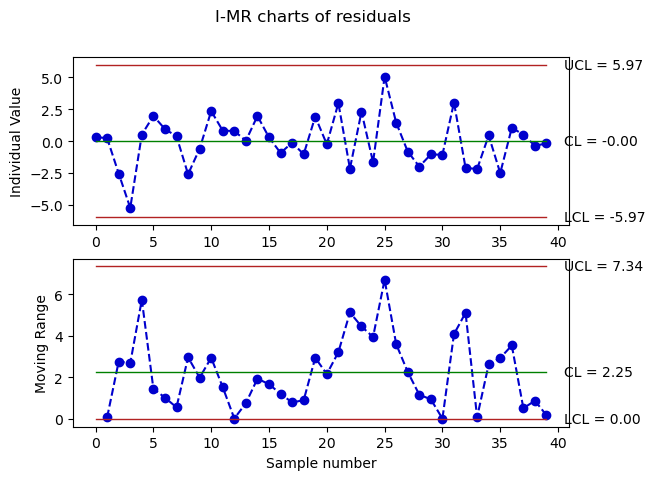

In [195]:
merged_df['residuals']=model.resid
carta1=qda.ControlCharts.IMR(merged_df,'residuals')

In [196]:
# create a vectors for dummy variables associated to each batch
merged_df['Dummy_top_right'] = np.where(merged_df['Position']=='top_right', 1, 0)
merged_df['Dummy_top_left'] = np.where(merged_df['Position']=='top_left', 1, 0)
merged_df['Dummy_bottom_right'] = np.where(merged_df['Position']=='bottom_right', 1, 0)
merged_df['Dummy_bottom_left'] = np.where(merged_df['Position']=='bottom_left', 1, 0)
x = merged_df[['Dummy_bottom_left']]
x = sm.add_constant(x)
y = merged_df['second_principal_component']
model = sm.OLS(y, x).fit()
qda.summary(model)

REGRESSION EQUATION
-------------------
second_principal_component =  + 0.019 const -0.078 Dummy_bottom_left

COEFFICIENTS
------------
             Term    Coef  SE Coef  T-Value  P-Value
            const  0.0194   0.5036   0.0385   0.9695
Dummy_bottom_left -0.0776   1.0072  -0.0770   0.9390

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
2.7584 0.0002    -0.0262

ANALYSIS OF VARIANCE
---------------------
           Source   DF   Adj SS  Adj MS  F-Value  P-Value
       Regression  1.0   0.0451  0.0451   0.0059   0.9390
            const  1.0   0.0113  0.0113   0.0015   0.9695
Dummy_bottom_left  1.0   0.0451  0.0451   0.0059   0.9390
            Error 38.0 289.1417  7.6090      NaN      NaN
            Total 39.0 289.1868     NaN      NaN      NaN


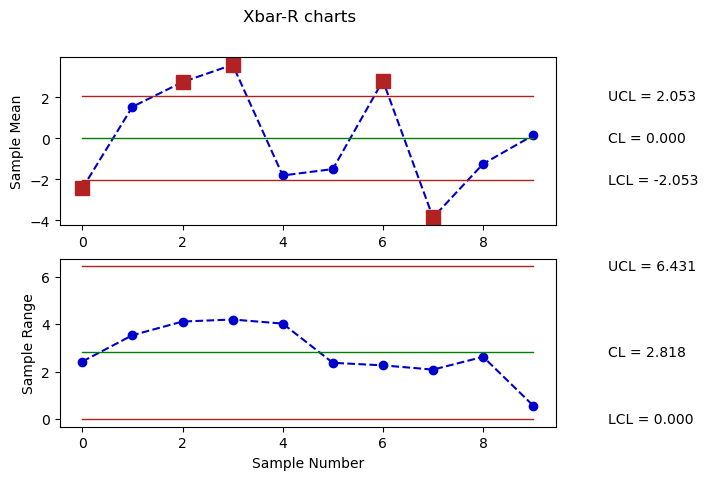

In [197]:
# Filter data for each position
first_position = merged_df[merged_df['Position'] == 'bottom_left']['second_principal_component']
second_position = merged_df[merged_df['Position'] == 'bottom_right']['second_principal_component']
third_position = merged_df[merged_df['Position'] == 'top_left']['second_principal_component']
fourth_position = merged_df[merged_df['Position'] == 'top_right']['second_principal_component']

# Create a new DataFrame with 10 rows and 4 columns
new_df_2 = pd.DataFrame({
    'First Position': first_position.reset_index(drop=True).iloc[:10],
    'Second Position': second_position.reset_index(drop=True).iloc[:10],
    'Third Position': third_position.reset_index(drop=True).iloc[:10],
    'Fourth Position': fourth_position.reset_index(drop=True).iloc[:10]
})
carta2=qda.ControlCharts.XbarR(new_df_2)

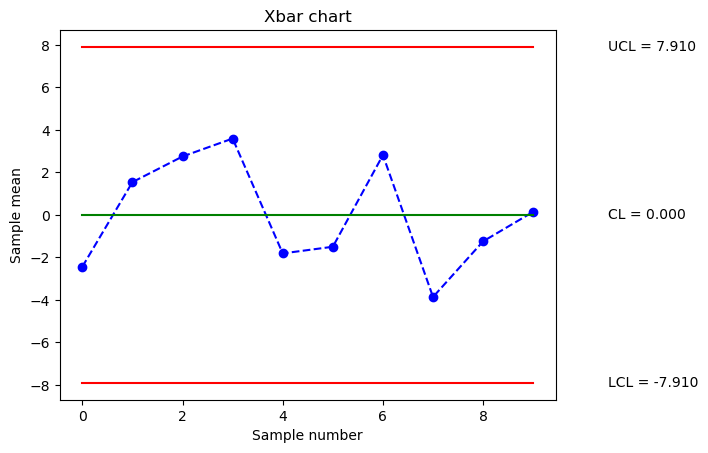

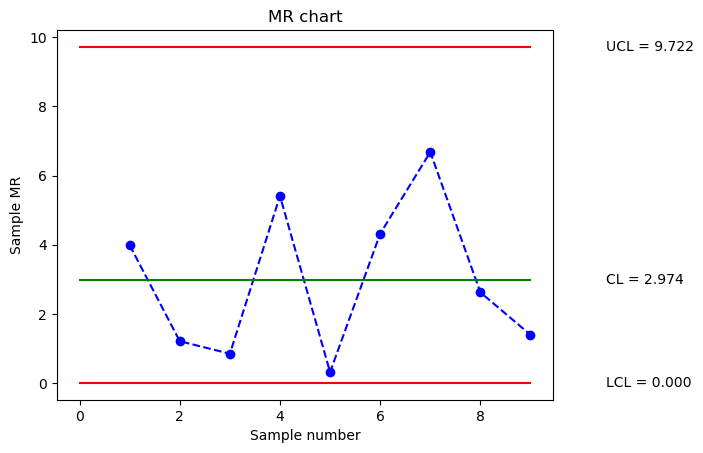

In [198]:
new_df_2['mean'] = new_df_2[['First Position', 'Second Position', 'Third Position', 'Fourth Position']].mean(axis=1)
new_df_2['MR'] = new_df_2['mean'].diff().abs()
Xbar_mean=new_df_2['mean'].mean()
R_mean=new_df_2['MR'].mean()/1.128
# Now we can compute the CL, UCL and LCL for Xbar and R
new_df_2['Xbar_CL'] = Xbar_mean
new_df_2['Xbar_UCL'] = Xbar_mean + 3*R_mean
new_df_2['Xbar_LCL'] = Xbar_mean - 3* R_mean

new_df_2['R_CL'] = R_mean*1.128
new_df_2['R_UCL'] = R_mean*1.128 + 3 * R_mean*0.853
new_df_2['R_LCL'] = max(R_mean*1.128 - 3 * R_mean*0.853,0)

new_df_2['Xbar_TEST1'] = np.where((new_df_2['mean'] >  new_df_2['Xbar_UCL']) | 
                (new_df_2['mean'] < new_df_2['Xbar_LCL']), new_df_2['mean'], np.nan)
new_df_2['R_TEST1'] = np.where((new_df_2['MR'] > new_df_2['R_UCL']) | 
                (new_df_2['MR'] < new_df_2['R_LCL']), new_df_2['MR'], np.nan)
# Plot the Xbar chart
plt.title('Xbar chart')
plt.plot(new_df_2['mean'], color='b', linestyle='--', marker='o')
plt.plot(new_df_2['Xbar_UCL'], color='r')
plt.plot(new_df_2['Xbar_CL'], color='g')
plt.plot(new_df_2['Xbar_LCL'], color='r')
plt.ylabel('Sample mean')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(new_df_2)+.5, new_df_2['Xbar_UCL'].iloc[0], 'UCL = {:.3f}'.format(new_df_2['Xbar_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(new_df_2)+.5, new_df_2['Xbar_CL'].iloc[0], 'CL = {:.3f}'.format(new_df_2['Xbar_CL'].iloc[0]), verticalalignment='center')
plt.text(len(new_df_2)+.5, new_df_2['Xbar_LCL'].iloc[0], 'LCL = {:.3f}'.format(new_df_2['Xbar_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(new_df_2['Xbar_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

# Plot the R chart
plt.title('MR chart')
plt.plot(new_df_2['MR'], color='b', linestyle='--', marker='o')
plt.plot(new_df_2['R_UCL'], color='r')
plt.plot(new_df_2['R_CL'], color='g')
plt.plot(new_df_2['R_LCL'], color='r')
plt.ylabel('Sample MR')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(new_df_2)+.5, new_df_2['R_UCL'].iloc[0], 'UCL = {:.3f}'.format(new_df_2['R_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(new_df_2)+.5, new_df_2['R_CL'].iloc[0], 'CL = {:.3f}'.format(new_df_2['R_CL'].iloc[0]), verticalalignment='center')
plt.text(len(new_df_2)+.5, new_df_2['R_LCL'].iloc[0], 'LCL = {:.3f}'.format(new_df_2['R_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(new_df_2['R_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()


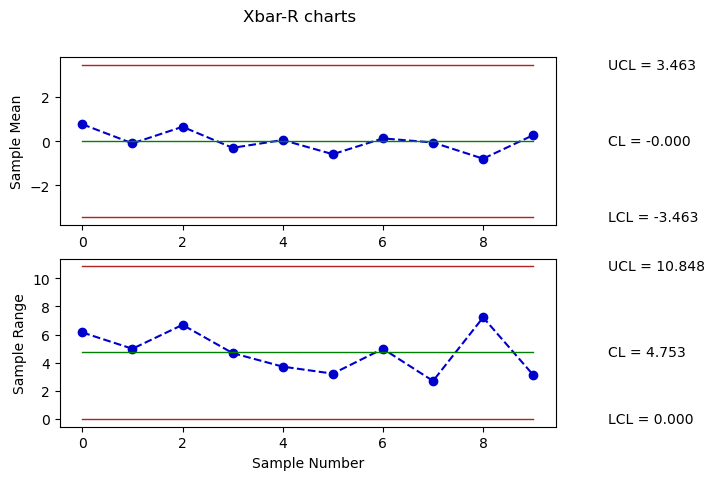

In [199]:
# Filter data for each position
first_position = merged_df[merged_df['Position'] == 'bottom_left']['third_principal_component']
second_position = merged_df[merged_df['Position'] == 'bottom_right']['third_principal_component']
third_position = merged_df[merged_df['Position'] == 'top_left']['third_principal_component']
fourth_position = merged_df[merged_df['Position'] == 'top_right']['third_principal_component']

# Create a new DataFrame with 10 rows and 4 columns
new_df_3 = pd.DataFrame({
    'First Position': first_position.reset_index(drop=True).iloc[:10],
    'Second Position': second_position.reset_index(drop=True).iloc[:10],
    'Third Position': third_position.reset_index(drop=True).iloc[:10],
    'Fourth Position': fourth_position.reset_index(drop=True).iloc[:10]
})
carta2=qda.ControlCharts.XbarR(new_df_3)

REGRESSION EQUATION
-------------------
third_principal_component =  + 0.582 const -2.329 Dummy_top_right

COEFFICIENTS
------------
           Term    Coef  SE Coef  T-Value  P-Value
          const  0.5824   0.3036   1.9180   0.0627
Dummy_top_right -2.3294   0.6073  -3.8359   0.0005

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
1.6631 0.2791     0.2602

ANALYSIS OF VARIANCE
---------------------
         Source   DF   Adj SS  Adj MS  F-Value  P-Value
     Regression  1.0  40.6965 40.6965  14.7143   0.0005
          const  1.0  10.1741 10.1741   3.6786   0.0627
Dummy_top_right  1.0  40.6965 40.6965  14.7143   0.0005
          Error 38.0 105.0994  2.7658      NaN      NaN
          Total 39.0 145.7959     NaN      NaN      NaN
Shapiro-Wilk test p-value on the residuals = 0.311
Runs test p-value on the residuals = 0.052


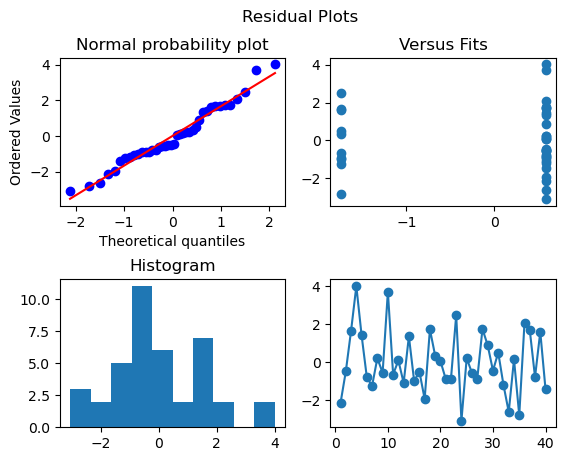

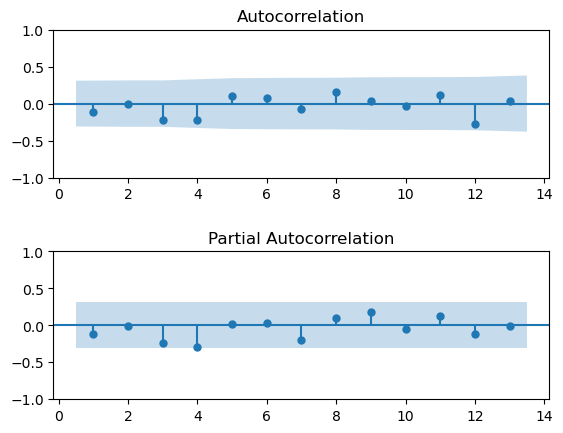

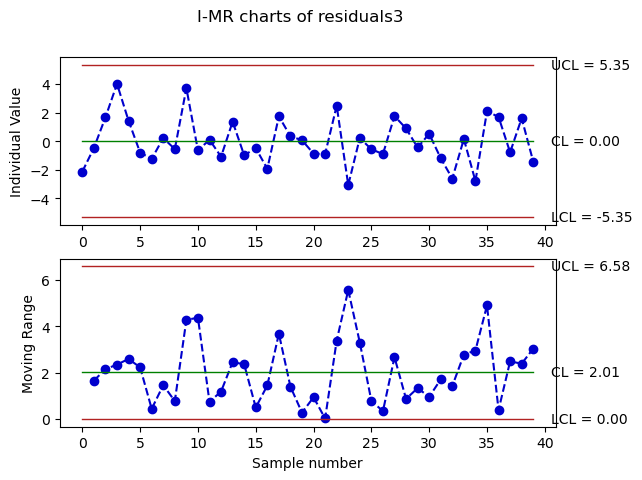

In [200]:



import statsmodels.api as sm
import qda

#create a vectors for dummy variables associated to each batch
merged_df['Dummy_top_right'] = np.where(merged_df['Position']=='top_right', 1, 0)
merged_df['Dummy_top_left'] = np.where(merged_df['Position']=='top_left', 1, 0)
merged_df['Dummy_bottom_right'] = np.where(merged_df['Position']=='bottom_right', 1, 0)
merged_df['Dummy_bottom_left'] = np.where(merged_df['Position']=='bottom_left', 1, 0)
x = merged_df[['Dummy_top_right']]
x = sm.add_constant(x)
y = merged_df['third_principal_component']
model = sm.OLS(y, x).fit()
qda.summary(model)

pca_third_component_res = np.array(model.resid)

import statsmodels.graphics.tsaplots as sgt
from statsmodels.sandbox.stats.runs import runstest_1samp
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)
_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(merged_df)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid, lags = int(len(merged_df)/3), zero=False, ax=ax[1],
method = 'ywm')
plt.show()
merged_df['residuals3']=model.resid
carta3=qda.ControlCharts.IMR(merged_df,'residuals3')


# Results

In this section we will analyze the results we obtained during the steps described in the previous section and we will propose an interpretation and comparisons with other possible ways to design the control chart and we will provide possible improvements for the design and for the data collection procedure.
We will provide an analysis of numerical results for each of the statistical methods used during the design and we will discuss how different choices could impact on each of them. The code is only related to the solution we have actually selected.

The alternative solutions that we compared with the one we chose are:
- defining two control charts to detect defects; one for voids and one for parts, without using a joint dataset with voids’ characteristics concentrated in two columns (one for mean and one for standard deviation) for each original feature.
- Preprocessing the data eliminating small voids trying to solve prospective problem at the beginning, and avoiding to fit models to describe the disturb.

## Principal component analysis
Starting from results we obtained with our method, the first principal component has 39.76% of explained variability, the second one 28.92% and third one 14.58%, so the cumulative percentage is 83.26%. The remaining variability is concentrated in the following 4 components, but in order to not make too complex the control chart loosing effectiveness we decided to avoid including them. Loadings already have qualitatively been described in previous section, but observing numerical data it appears that loadings referred to voids’ features are in general higher than 0.2 in absolute value and they are positive for means and negative for standard deviations. Parts’ loadings are significant (higher than 0.2) only for major and minor axis length. If we separated parts and voids creating ad hoc control chart for different defects, we would have a higher percentage in the first three components. For example using three principal components for the part dataset we would obtain 88.32% of variability (respectively 57.60%; 18.47% and 12.25%), so not a huge increment, while for voids we would obtain 93.02% of variability (respectively 57.36%; 20.60% and 15.06%). In case of the processed dataset we would obtain 82.85% of variability (respectively 39.58%; 34.46% and 8.81%) so our solution is less effective only in the case of dataset splitting but, as we will remark in multivariate chart analysis, we have to consider that the number of features included is 6 and not 3 because we would use them in two different charts.

## Normality check
Starting from the results we obtained in the selected alternative, p-values of the Shapiro-Wilk test are 99.5%, 46.1% and 69.4% with solid confirmations given by QQ-plot, so we can say that the principal components are normal without any problem. However in case of divided datasets p-values would be 11.9%, 0% and 25.8% for the parts’ dataset while the voids components would be all normal. For this reason a transformation should be performed on the second component. The same situation would be observed in the preprocessed dataset because the p-value of the Shapiro-Wilk test performed on the second principal components would be 2.3%.

## Scatterplot and linear models
Scatterplot description of the proposed solution has been already provided in previous section so we will focus on numerical results of models fitted to confirm hypothesis. We have not just tested the model in line with our hypothesis, but we also tried different ones to demonstrate they were not statistically significant. First of all for the first component we tried to design a model using a dummy variable equal to one in case of pieces on the top and equal to zero for pieces on the bottom, obtaining 0.4505 and 0.2878 as p-values of F-test on coefficients. Then we tried including all the positions in the regression obtaining a p-value equal to 12.42% for dummy variable used to indicate top left position. At the end the model without top left as dummy variable has indicated all the coefficients as significant and normal residuals with p-value of Shapiro-Wilk test equal to 78.4% and Run's test p-value equal to 76% confirming our hypothesis. Then as already said in the previous section any model has been fitted on the second component while for the third one we used top right as dummy variable obtaining a p-value of 0.5% for F-test on beta1 coefficient and 6.27% on the one on the intercept. Although p-value is higher than 5% we decided to reject null hypothesis and use the model for fitting the behavior of the component because the value is not too high to reject our hypothesis. If the same analysis were performed on the case with two separated datasets there would be several differences, in fact looking at the scatter plot in parts’ dataset the first principal component has a huge variability depending on images indexes. The same behavior can be observed in the third component while the second component has completely opposite scores’ pattern, since they are dependent on the position of the piece in the tray. In the case of preprocessed dataset the principal components behavior is similar with the one just described, even the dummy variable to include in the linear mode is the same since second principal component’s scores differ when the piece is on the top right.

## Multivariate control chart design
The last step is creating the multivariate control charts. Using the method which we have already described we have obtained three different control charts. To evaluate the probability to observe an alarm even if the system is in control (false defect) we can use the formula: 

alpha’ = 1 - (1 - alpha1) * (1 - alpha2) * (1 - alpha3),

where alpha1 is the probability to detect a false defect in the first control chart, alpha2 is the probability to detect a false defect in the second control chart and alpha3 in the third one. 
While for the second control chart alpha2 = alpha = 0.0027 (using K=3), for the first and the third control chart we are using a IMR chart based on residuals so we are testing all the pieces and not just the samples. For this reason:

alpha1 = alpha3 = 1 - (1 - alpha)^4,

where 4 is the number of pieces in one sample. So alpha1 and alpha3 are equal to 0.01076.
Using the first formula alpha’ is equal to 0.024 so ARL (average number of samples needed to detect a fail) is equal to 41.59. We can easily notice that ARL is very lower than 371 which is evaluated for a single chart with alpha equal to 0.0027. Looking at the control limits it is not correct analyze them comparing absolute values (for example special control chart on residuals of third component has UCL equal to 5.35 while special control chart of first component has UCL equal to 5.97) but it is important to visualize how the methods adopted, calculate second component control chart with the formula for individual samples and fit models for the others, have solved respectively stratification and hugging problems. 
If the strategy of splitting the dataset were applied we would have problems related to false alarms. In fact having six components to evaluate with two of them based on IMR charts on residuals the exponential law would create a huge increase in false alarm because, using previous formulas with, alpha’ would be equal to 0.0319 and ARL equal to 31.325. Moreover not using special control charts for components in which there is correlation between samples has positive impacts on alpha’ but negative impacts on beta. We have to remember that we are not fitting a model on this type of components only because we do not have enough information to do it, but if we had those data there would be positive impacts on the ability to detect out of control pieces. The same can be said regarding the case in which preprocessing is performed, because we would have a higher ARL due to the fact that only one component out of three would be modelled obtaining a special control chart: alpha’ would be equal to 0.016 and ARL equal to 62.14, but the ability to detect real defects would decrease both because of absence of model fitting in two components and decreasing in variance explained. In this case there would be also a positive effect because reducing the scale of the components would be easier to detect a completely anomaly variation. However as described in the assumption section with an automatic filter on void we could have some problems in new pieces to test so this aspect could be useful only analyzing singularly each piece which is not a best practice.

To conclude, our multivariate control chart's accuracy depends on how defects' principal components are influenced. If actual metrics and preprocess are not enough accuarate we will provide more specific metrics and add some preprocess strategies as discussed in the assumption section.

## Final comments
In order to evaluate a control chart, we need to know how it is good in detecting real defects and how it is good in not detecting false alarms. In our context we believe that ability to detect defects has an higher importance because additive manufacturing needs long production time so interrupting production is not so expensive as in flow shops, for example. However this ability does not depend only on K decision variable, because that parameter can be a leverage only when the dataset has already been defined. The real key of the problem to improve this performance is to provide better datasets. The instruments that we can use are preprocessing, for example including features that are significant for detection and data collection improvements like reducing the distance of pieces among each other and defining fix spots on the tray to avoid differences among images. While for the second type of procedures we should hypothetically suggest them to the quality manager, the preprocessing can be improved looking at real defects in phase II.


# References (if any)


# PHASE 2 -----------------------------

# Preliminary data analysis

In the considerations made in phase 1 we proposed 3 approaches for the control chart design. The first one looked to minimized the number of false alarms and try to create a model of the various principal components (PCs) through linear regressors based on position, immediately solving the problem related to perspective. The second would have involved immediately eliminating variability created by perspective, proposing a pre-processing, while the third option divide the dataset in a “part” part and a “void” part, therefore limiting possible problems tied to dimensionality and increasing the chart’s effectiveness, but, at the same time, increasing the number of PCs used, doubling the number of charts, therefore increasing the number of false alarms.
Opting to use the more careful, and theory-aligned, method, the first option was chosen, while still analyzing the results of all 3 approaches to confront them in greater detail. 


Nevertheless, looking at the scores of the PCs we obtained for the pieces in the new dataset (using the previous mean and standard deviation) we realized that the faults we needed to analyze were not influencing the initial features to create big enough discrepancies compared to the phase 1 pieces. In fact, using the proposed approach, the greatest risk was to have a control chart that used such a complex model that it would have difficulty in detecting any small change in a single element. This can be seen, for example, in pieces where the base has a dent; here some attributes change while others, like the area, tend to remain the same. 

To improve the situation, it was decided to take advantage of the other 2 alternatives presented in phase 1. 

As already predicted in the design phase, the pre-processing phase would have guaranteed a degree of variability management, without having to introduce linear models that would have handled the perspective problem in a limited way.  How to proceed in this way was dictated by the new elements we received. Analyzing the pieces we now had, we could divide the faults in 2 types (on the part and on the voids), and then divide the latter in 2 more, based on the type of problem (excess or lack of material). Summarizing the issues could be: due to the piece (dents or imperfections in the base), due to the voids (those with irregular edges or reduced area due to too much material) or due to lack of material (creating problems in continuity with the voids). Having isolated these issues, the methodology was changed accordingly. For example, eliminating the smaller voids to clean the dataset would be a bad idea, since some voids that became smaller due to an error could be immediately eliminated from the analysis, therefore making their detection impossible. Therefore, as a selection strategy, it was decided to limit the analysis of each piece to the 30 biggest voids, a number big enough to surely include any shrunk void.  During phase 1 we also had the idea of adding characteristics relative to distribution as a median or quartiles, but seeing how much performances diminished with the increase in the number of features, we decided to limit the analysis on mean and standard deviation. 

As previously stated, dividing the dataset betters performances because it singularly analyzes 2 types of faults (on parts and voids), since these 2 are easily distinguishable in the images, we decided to opt for this solution for this phase. Thanks to the introduction of this other pre-processing element it is possible to leverage an explained variability that doesn’t increase in terms of percentage, but targets only one of the 2 types of faults.

In [201]:
# Import functions and old dataset
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, levene
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import qda

# Import the dataset
data = pd.read_csv('image_statistics.csv')
# Print the first 5 rows of the dataset
data.head()

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels]
0,2024-03-26_09-38-35-502_MV540-H@xWyHvMbxwzDCYC...,top_left,part,0,39334,3979.892,0.145,-1.399,0.775,0.658,276.941,274.023,223.789
1,2024-03-26_09-38-35-502_MV540-H@xWyHvMbxwzDCYC...,top_left,void,1,94,37.556,0.773,1.445,0.949,0.696,14.463,9.178,10.940
2,2024-03-26_09-38-35-502_MV540-H@xWyHvMbxwzDCYC...,top_left,void,2,95,46.142,0.935,-1.466,0.872,0.565,19.647,6.959,10.998
3,2024-03-26_09-38-35-502_MV540-H@xWyHvMbxwzDCYC...,top_left,void,3,239,77.527,0.942,-1.432,0.909,0.569,31.984,10.699,17.444
4,2024-03-26_09-38-35-502_MV540-H@xWyHvMbxwzDCYC...,top_left,void,4,195,61.420,0.885,1.545,0.907,0.577,24.535,11.419,15.757


In [202]:
# Divide the old dataset

part_dataset = data[data['Region type'] == 'part']
void_dataset = data[data['Region type'] == 'void']


In [203]:
# Calculate mean and std for each piece (old dataset)

stats_df = void_dataset.groupby(['Image name', 'Position']).agg(
    area_mean=('Area [pixels]', 'mean'),
    area_std=('Area [pixels]', 'std'),
    eccentricity_mean=('Eccentricity', 'mean'),
    eccentricity_std=('Eccentricity', 'std'),
    solidity_mean=('Solidity', 'mean'),
    solidity_std=('Solidity', 'std'),
    perimeter_mean=('Perimeter [pixels]','mean'),
    perimeter_std=('Perimeter [pixels]','std'),
    extent_mean=('Extent','mean'),
    extent_std=('Extent','std'),
    major_axis_length_mean=('Major Axis Length [pixels]','mean'),
    major_axis_length_std=('Major Axis Length [pixels]','std'),
    minor_axis_length_mean=('Minor Axis Length [pixels]','mean'),
    minor_axis_length_std=('Minor Axis Length [pixels]','std'),
    equivalent_diameter_mean=('Equivalent Diameter [pixels]','mean'),
    equivalent_diameter_std=('Equivalent Diameter [pixels]','std'),
    orientation_mean=('Orientation [radians]', 'mean'),
    orientation_std=('Orientation [radians]', 'std'),
).reset_index()

# Merge the statistics with the first dataset
merged_df = pd.merge(part_dataset, stats_df, on=['Image name', 'Position'], how='left')

In [204]:
# Import new dataset

data_new = pd.read_csv('image_statistics2.csv')
data_new.head()

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels]
0,2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...,top_left,part,0,37885.0,4247.703,0.103,-0.567,0.747,0.722,279.213,277.742,219.629
1,2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...,top_left,void,1,69.0,35.142,0.848,-1.274,0.841,0.548,13.898,7.361,9.373
2,2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...,top_left,void,2,87.0,43.728,0.951,-1.331,0.888,0.544,19.849,6.164,10.525
3,2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...,top_left,void,3,196.0,76.355,0.965,-1.289,0.879,0.412,32.600,8.579,15.797
4,2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...,top_left,void,4,190.0,63.213,0.895,-1.477,0.892,0.562,24.793,11.037,15.554


In [205]:
# Divide the new dataset

part_dataset_new = data_new[data_new['Region type'] == 'part']
void_dataset_new = data_new[data_new['Region type'] == 'void']

In [206]:
# Calculate mean and std for each piece (new dataset)

stats_df_new = void_dataset_new.groupby(['Image name', 'Position']).agg(
    area_mean=('Area [pixels]', 'mean'),
    area_std=('Area [pixels]', 'std'),
    eccentricity_mean=('Eccentricity', 'mean'),
    eccentricity_std=('Eccentricity', 'std'),
    solidity_mean=('Solidity', 'mean'),
    solidity_std=('Solidity', 'std'),
    perimeter_mean=('Perimeter [pixels]','mean'),
    perimeter_std=('Perimeter [pixels]','std'),
    extent_mean=('Extent','mean'),
    extent_std=('Extent','std'),
    major_axis_length_mean=('Major Axis Length [pixels]','mean'),
    major_axis_length_std=('Major Axis Length [pixels]','std'),
    minor_axis_length_mean=('Minor Axis Length [pixels]','mean'),
    minor_axis_length_std=('Minor Axis Length [pixels]','std'),
    equivalent_diameter_mean=('Equivalent Diameter [pixels]','mean'),
    equivalent_diameter_std=('Equivalent Diameter [pixels]','std'),
    orientation_mean=('Orientation [radians]', 'mean'),
    orientation_std=('Orientation [radians]', 'std')
).reset_index()

# Merge the statistics with the first dataset
merged_df_new = pd.merge(part_dataset_new, stats_df_new, on=['Image name', 'Position'], how='left')

# Test of your proposed approach on new data

In the following section the 2 cases will be presented. The first using the methodology introduced in phase 1, the second using the corrections we previously introduced, pre-processing and dataset division.

## OLD CHART - First Method

In the first method, after having imported the dataset, we went to create a new one that would have all the characteristics of the first phase, meaning mean and standard deviation of the voids and the characteristics of the parts. Then, the PCA model, fitted in phase 1, was used to calculate the scores. In this case by model we mean the loadings of the selected components. Obviously, before doing this, it was necessary to transform the features since they had been standardized in phase 1, as they related to different scales. 

To standardize means and standard deviations relative to the columns used in phase 1 were employed. Afterwards, they were reported in the charts to reveal the eventual out-of-control pieces (OOCs). In particular, the first PC needed a linear model and a I-MR chart on the residuals, therefore the value was calculated on the subtraction of the fitted value (obtained through the model based on the position of the piece in the new picture) and the real one. For the second PC, no model was fitted since in the exploratory graphs there was no presence of a pattern that could have related to a dummy, therefore the visualization was done based on the sample. For the 3rd PC in phase 1 another model was introduced, with several dummies were involved, meaning, once again a I-MR chart on residuals was used.

In [207]:
# Select the features for PCA (excluding non-numeric columns like 'Image name' and 'Position')
features = merged_df.drop(['Image name', 'Position','ID','Region type'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca.fit(scaled_features)

# Transform the data onto the new PCA space
pca_data = pca.transform(scaled_features)

# You can now use pca_data for further analysis or visualization

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Access the loadings (eigenvectors)
loadings = pca.components_

Principal Component 1: 0.3813
Principal Component 2: 0.2745
Principal Component 3: 0.1388
Principal Component 4: 0.0496
Principal Component 5: 0.0473
Principal Component 6: 0.0317
Principal Component 7: 0.0265
Principal Component 8: 0.0137
Principal Component 9: 0.0131
Principal Component 10: 0.0073
Principal Component 11: 0.0052
Principal Component 12: 0.0036
Principal Component 13: 0.0031
Principal Component 14: 0.0022
Principal Component 15: 0.0007
Principal Component 16: 0.0005
Principal Component 17: 0.0003
Principal Component 18: 0.0002
Principal Component 19: 0.0001
Principal Component 20: 0.0001
Principal Component 21: 0.0001
Principal Component 22: 0.0000
Principal Component 23: 0.0000
Principal Component 24: 0.0000
Principal Component 25: 0.0000
Principal Component 26: 0.0000
Principal Component 27: 0.0000


In [208]:
# Extract the Principal Components

pca_first_component = pca.transform(scaled_features)[:, 0]
pca_second_component = pca.transform(scaled_features)[:, 1]  
pca_third_component = pca.transform(scaled_features)[:, 2] 

pca_first_component_loadings = loadings[0]
pca_second_component_loadings = loadings[1]
pca_third_component_loadings = loadings[2]

features_names = features.columns.tolist()
mean_values = merged_df[features_names].mean()
std_values = merged_df[features_names].std()

In [209]:
# Standardizing with the previous values

merged_df_prova = merged_df_new.copy()

mean_dict = mean_values.to_dict()
std_dict = std_values.to_dict()

# Applying the transformation to the specified columns in columns_names
for col in features_names:
    if col in merged_df_prova.columns:
        mean = mean_dict.get(col, 0)
        std = std_dict.get(col, 1)  # If std deviation is = 0, in order not to divide by 0, we can use a fallback (es. 1)
        if std != 0:  # Only if std is not = 0
            merged_df_prova[col] = (merged_df_prova[col] - mean) / std

# Printing the modified Dataframe for verification
print(merged_df_prova)

                                           Image name      Position  \
0   2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...      top_left   
1   2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...   bottom_left   
2   2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...     top_right   
3   2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
4   2024-05-22_17-15-57-046_MV540-H@EOaAFjS1zEFNUI...      top_left   
5   2024-05-22_17-15-57-046_MV540-H@EOaAFjS1zEFNUI...   bottom_left   
6   2024-05-22_17-15-57-046_MV540-H@EOaAFjS1zEFNUI...     top_right   
7   2024-05-22_17-15-57-046_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
8   2024-05-22_17-22-06-952_MV540-H@EOaAFjS1zEFNUI...      top_left   
9   2024-05-22_17-22-06-952_MV540-H@EOaAFjS1zEFNUI...   bottom_left   
10  2024-05-22_17-22-06-952_MV540-H@EOaAFjS1zEFNUI...     top_right   
11  2024-05-22_17-22-06-952_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
12  2024-05-22_17-17-37-754_MV540-H@EOaAFjS1zEFNUI...      top_left   
13  20

In [210]:
# Adding the columns for PC1, PC2 and PC3 

pca_first_component_loadings = np.array(pca_first_component_loadings)
pca_second_component_loadings = np.array(pca_second_component_loadings)
pca_third_component_loadings = np.array(pca_third_component_loadings)

assert len(features_names) == len(pca_first_component_loadings) == len(pca_second_component_loadings) == len(pca_third_component_loadings), "Mismatch in the length of features and PCA loadings"

# Calculating PC1, PC2 and PC3
merged_df_prova['PC1'] = merged_df_prova[features_names].dot(pca_first_component_loadings)
merged_df_prova['PC2'] = merged_df_prova[features_names].dot(pca_second_component_loadings)
merged_df_prova['PC3'] = merged_df_prova[features_names].dot(pca_third_component_loadings)

# Adding the TR and BR columns
merged_df_prova['TR'] = 0
merged_df_prova['BR'] = 0

# Setting 'TR' to 1 for rows with 'Position' == 'top_right'
merged_df_prova.loc[merged_df_prova['Position'] == 'top_right', 'TR'] = 1

# Setting 'TBRR' to 1 for rows with 'Position' == 'bottom_right'
merged_df_prova.loc[merged_df_prova['Position'] == 'bottom_right', 'BR'] = 1


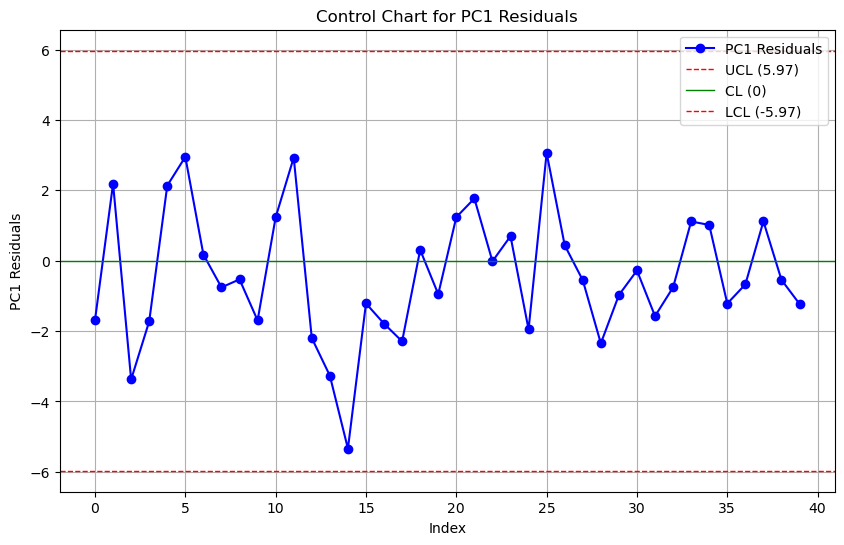

In [211]:
# PC1 Chart

CC_PC1 = pd.DataFrame()

merged_df_prova['PC1_reg'] = 2.498 - 5.401*merged_df_prova['TR'] - 4.593*merged_df_prova['BR']
CC_PC1['PC1_res'] = merged_df_prova['PC1'] - merged_df_prova['PC1_reg']
CC_PC1['UCL'] = 5.97
CC_PC1['CL'] = 0
CC_PC1['LCL'] = -5.97

# Control chart plot
plt.figure(figsize=(10, 6))
plt.plot(CC_PC1.index, CC_PC1['PC1_res'], marker='o', linestyle='-', color='b', label='PC1 Residuals')
plt.axhline(y=CC_PC1['UCL'].iloc[0], color='r', linestyle='--', linewidth=1, label='UCL (5.97)')
plt.axhline(y=CC_PC1['CL'].iloc[0], color='g', linestyle='-', linewidth=1, label='CL (0)')
plt.axhline(y=CC_PC1['LCL'].iloc[0], color='r', linestyle='--', linewidth=1, label='LCL (-5.97)')

# Labels and title 
plt.title('Control Chart for PC1 Residuals')
plt.xlabel('Index')
plt.ylabel('PC1 Residuals')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

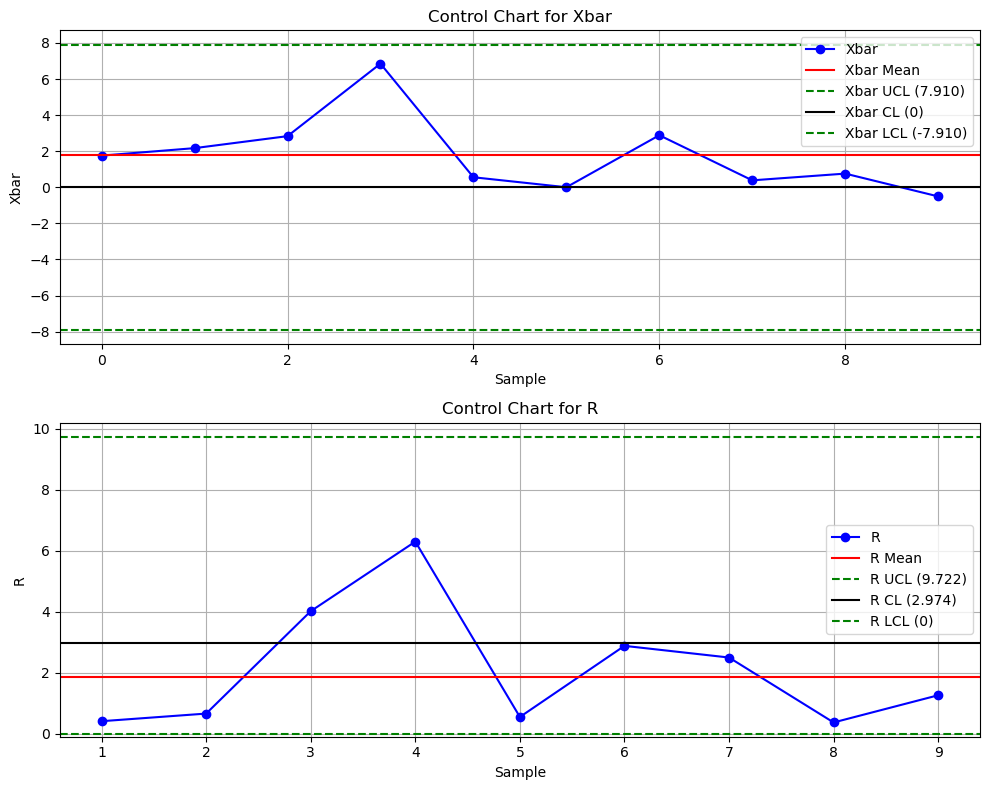

In [212]:
# PC2 Chart

# Filter data for each position
first_position = merged_df_prova[merged_df_prova['Position'] == 'bottom_left']['PC2']
second_position = merged_df_prova[merged_df_prova['Position'] == 'bottom_right']['PC2']
third_position = merged_df_prova[merged_df_prova['Position'] == 'top_left']['PC2']
fourth_position = merged_df_prova[merged_df_prova['Position'] == 'top_right']['PC2']

# Create a new DataFrame with 10 rows and 4 columns
CC_PC2 = pd.DataFrame({
    'First Position': first_position.reset_index(drop=True).iloc[:10],
    'Second Position': second_position.reset_index(drop=True).iloc[:10],
    'Third Position': third_position.reset_index(drop=True).iloc[:10],
    'Fourth Position': fourth_position.reset_index(drop=True).iloc[:10]
})

CC_PC2['mean'] = CC_PC2[['First Position', 'Second Position', 'Third Position', 'Fourth Position']].mean(axis=1)
CC_PC2['MR'] = CC_PC2['mean'].diff().abs()

Xbar_mean=CC_PC2['mean'].mean()
R_mean=CC_PC2['MR'].mean()/1.128

# Now we can compute the CL, UCL and LCL for Xbar and R
CC_PC2['Xbar_CL'] = 0
CC_PC2['Xbar_UCL'] = 7.910
CC_PC2['Xbar_LCL'] = -7.910

CC_PC2['R_CL'] = 2.974
CC_PC2['R_UCL'] = 9.722
CC_PC2['R_LCL'] = 0

import matplotlib.pyplot as plt

# Plot of the X-bar and R control charts
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Xbar control chart
axes[0].plot(CC_PC2.index, CC_PC2['mean'], marker='o', color='b', label='Xbar')
axes[0].axhline(y=Xbar_mean, color='r', linestyle='-', label='Xbar Mean')
axes[0].axhline(y=CC_PC2['Xbar_UCL'][0], color='g', linestyle='--', label='Xbar UCL (7.910)')
axes[0].axhline(y=CC_PC2['Xbar_CL'][0], color='k', linestyle='-', label='Xbar CL (0)')
axes[0].axhline(y=CC_PC2['Xbar_LCL'][0], color='g', linestyle='--', label='Xbar LCL (-7.910)')
axes[0].set_title('Control Chart for Xbar')
axes[0].set_xlabel('Sample')
axes[0].set_ylabel('Xbar')
axes[0].legend()
axes[0].grid(True)

# Control chart for R
axes[1].plot(CC_PC2.index, CC_PC2['MR'], marker='o', color='b', label='R')
axes[1].axhline(y=R_mean, color='r', linestyle='-', label='R Mean')
axes[1].axhline(y=CC_PC2['R_UCL'][0], color='g', linestyle='--', label='R UCL (9.722)')
axes[1].axhline(y=CC_PC2['R_CL'][0], color='k', linestyle='-', label='R CL (2.974)')
axes[1].axhline(y=CC_PC2['R_LCL'][0], color='g', linestyle='--', label='R LCL (0)')
axes[1].set_title('Control Chart for R')
axes[1].set_xlabel('Sample')
axes[1].set_ylabel('R')
axes[1].legend()
axes[1].grid(True)

# Show plot
plt.tight_layout()
plt.show()


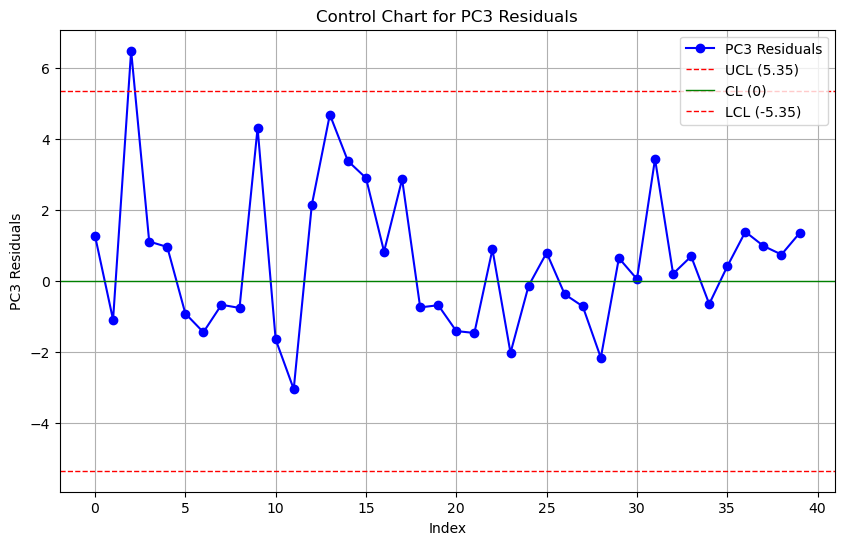

In [213]:
# Carta Componente Principale 3

CC_PC3 = pd.DataFrame()

merged_df_prova['PC3_reg'] = 0.582 - 2.329*merged_df_prova['TR'] 
CC_PC3['PC3_res'] = merged_df_prova['PC3'] - merged_df_prova['PC3_reg']
CC_PC3['UCL'] = 5.35
CC_PC3['CL'] = 0
CC_PC3['LCL'] = -5.35

# Plot della carta di controllo
plt.figure(figsize=(10, 6))
plt.plot(CC_PC3.index, CC_PC3['PC3_res'], marker='o', linestyle='-', color='b', label='PC3 Residuals')
plt.axhline(y=CC_PC3['UCL'].iloc[0], color='r', linestyle='--', linewidth=1, label='UCL (5.35)')
plt.axhline(y=CC_PC3['CL'].iloc[0], color='g', linestyle='-', linewidth=1, label='CL (0)')
plt.axhline(y=CC_PC3['LCL'].iloc[0], color='r', linestyle='--', linewidth=1, label='LCL (-5.35)')

# Etichette e titolo
plt.title('Control Chart for PC3 Residuals')
plt.xlabel('Index')
plt.ylabel('PC3 Residuals')
plt.legend()
plt.grid(True)

# Mostra il plot
plt.show()

## NEW CHART - Second Method

In this second method the first thing we did was divide the input data into voids and parts. Once that was done we treated each chart separately. Starting from the voids, the scores were calculated using the loadings obtained from the parts of the phase 1 dataset. In the same way, to standardize we used mean and standard deviation from the columns of those same samples. As already showed in part 1, normality of each PC was checked. Here we used 3 PCs, with the 2nd being transformed to account for an evident non-normality, meaning charts use components that were actually considered, except for component 2, were they are transformed by Box-Cox. Also, notice how the value of K was altered to make the chart more effective (Beta was improved). This choice reflects what was said in the previous section, since the number of false alarms is less critical than that of the actual failures. 

Lastly, for the void-related charts we already highlighted in phase 1 how the normality and IID hypotheses were being respected, so, once the input data was obtained and the PCs relative to the phase 1 dataset were calculated (through standardization of means and standard deviations of columns in the same dataset), we plotted those components in the respective control charts. In this case we reduced the initial data to the 30 biggest voids, for reasons we talked about before, something that allowed us to have a higher card efficiency without having to modify K. Note how these are the only charts that include a 4th PC. This is because from the analysis of explained variance the 4th PC affects almost 8% of it, meaning the total explained variance would get to 80% by including it.

In regards to the choice of the multivariate control chart, the second method was created accordingly to considerations already made in phase 1, therefore coherently with the first method. 

### On the parts

In [214]:
# Select the features for PCA (excluding non-numeric columns like 'Image name' and 'Position')
features = part_dataset.drop(['Image name', 'Position','ID','Region type'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca.fit(scaled_features)

# Transform the data onto the new PCA space
pca_data = pca.transform(scaled_features)

# You can now use pca_data for further analysis or visualization

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Access the loadings (eigenvectors)
loadings = pca.components_

Principal Component 1: 0.5760
Principal Component 2: 0.1847
Principal Component 3: 0.1225
Principal Component 4: 0.0752
Principal Component 5: 0.0375
Principal Component 6: 0.0034
Principal Component 7: 0.0006
Principal Component 8: 0.0002
Principal Component 9: 0.0000


In [215]:
# Extract the Principal Components

pca_first_component = pca.transform(scaled_features)[:, 0]
pca_second_component = pca.transform(scaled_features)[:, 1]  
pca_third_component = pca.transform(scaled_features)[:, 2] 

pca_first_component_loadings = loadings[0]
pca_second_component_loadings = loadings[1]
pca_third_component_loadings = loadings[2]

features_names = features.columns.tolist()
mean_values = part_dataset[features_names].mean()
std_values = part_dataset[features_names].std()

In [216]:
# Standardizing the previous values

part_dataset_prova = part_dataset_new.copy()

mean_dict = mean_values.to_dict()
std_dict = std_values.to_dict()

# Applying the transformation to the specified columns in columns_names
for col in features_names:
    if col in part_dataset_prova.columns:
        mean = mean_dict.get(col, 0)
        std = std_dict.get(col, 1)  # If the std deviation is = 0, in order not to divide by 0, we can use a fallback (es. 1)
        if std != 0:  # Only if std is not = 0
            part_dataset_prova[col] = (part_dataset_prova[col] - mean) / std

# Printing the modified DataFrame for verification
print(part_dataset_prova)

                                             Image name      Position  \
0     2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...      top_left   
45    2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...   bottom_left   
88    2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...     top_right   
139   2024-05-22_17-22-26-218_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
187   2024-05-22_17-15-57-046_MV540-H@EOaAFjS1zEFNUI...      top_left   
227   2024-05-22_17-15-57-046_MV540-H@EOaAFjS1zEFNUI...   bottom_left   
269   2024-05-22_17-15-57-046_MV540-H@EOaAFjS1zEFNUI...     top_right   
317   2024-05-22_17-15-57-046_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
364   2024-05-22_17-22-06-952_MV540-H@EOaAFjS1zEFNUI...      top_left   
408   2024-05-22_17-22-06-952_MV540-H@EOaAFjS1zEFNUI...   bottom_left   
454   2024-05-22_17-22-06-952_MV540-H@EOaAFjS1zEFNUI...     top_right   
502   2024-05-22_17-22-06-952_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
546   2024-05-22_17-17-37-754_MV540-H@EOaAFjS1zEFNU

In [217]:
# Adding columns for PC1, PC2 and PC3

pca_first_component_loadings = np.array(pca_first_component_loadings)
pca_second_component_loadings = np.array(pca_second_component_loadings)
pca_third_component_loadings = np.array(pca_third_component_loadings)

assert len(features_names) == len(pca_first_component_loadings) == len(pca_second_component_loadings) == len(pca_third_component_loadings), "Mismatch in the length of features and PCA loadings"

# Calculating PC1, PC2 and PC3 
part_dataset_prova['PC1'] = part_dataset_prova[features_names].dot(pca_first_component_loadings)
part_dataset_prova['PC2'] = part_dataset_prova[features_names].dot(pca_second_component_loadings)
part_dataset_prova['PC3'] = part_dataset_prova[features_names].dot(pca_third_component_loadings)                                   

In [218]:
# Normality test

import matplotlib.pyplot as plt
stat_shapiro, p_shapiro = stats.shapiro(pca_first_component)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro, p_shapiro))

stat_shapiro, p_shapiro = stats.shapiro(pca_second_component)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro, p_shapiro))
pca_second_component_boxcox = pca_second_component + 10

stat_shapiro, p_shapiro = stats.shapiro(pca_third_component)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro, p_shapiro))

Statistic = 0.956, p-val = 0.119
Statistic = 0.876, p-val = 0.000
Statistic = 0.966, p-val = 0.258


> PC2 is not normal, PC1 and 3 are. We therefore used a box-cox transformation on PC2. 

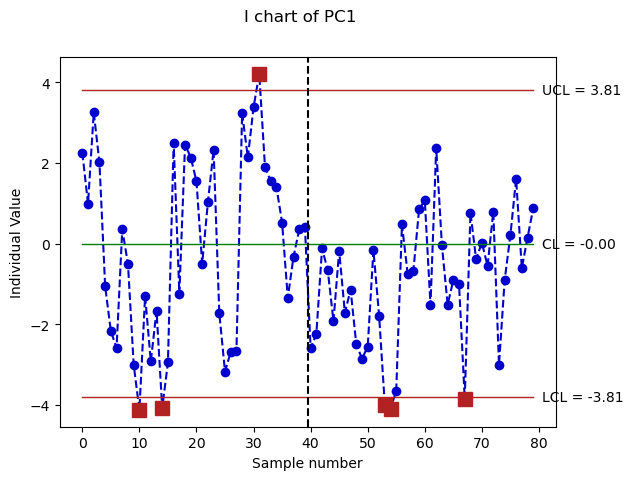

In [219]:
# PC1 Chart

pca_first_component_df = pd.DataFrame(pca_first_component, columns=['pca_first_component'])
pca_first_component_df['PC1'] = pca_first_component_df['pca_first_component']
pc1_column_df = part_dataset_prova[['PC1']]
cc_df_pc1 = pd.concat([pca_first_component_df, pc1_column_df], axis=0)
cc_df_pc1.drop(columns=['pca_first_component'], inplace=True)
cc_df_pc1.reset_index(drop=True, inplace=True)
data_IMR_pc1_part = qda.ControlCharts.IMR(cc_df_pc1, col_name='PC1', K=2.5, subset_size=40, mr = False)

Lambda = -3.149


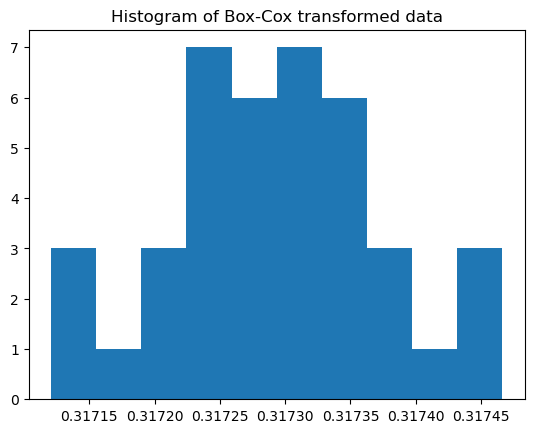

Statistic = 0.984, p-val = 0.824


In [220]:
# Box-Cox on PC2

[data_norm, lmbda] = stats.boxcox(pca_second_component_boxcox)

print('Lambda = %.3f' % lmbda)

plt.hist(data_norm)
plt.title('Histogram of Box-Cox transformed data')
plt.show()

stat_shapiro, p_shapiro = stats.shapiro(data_norm)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro, p_shapiro))

pca_second_component = data_norm

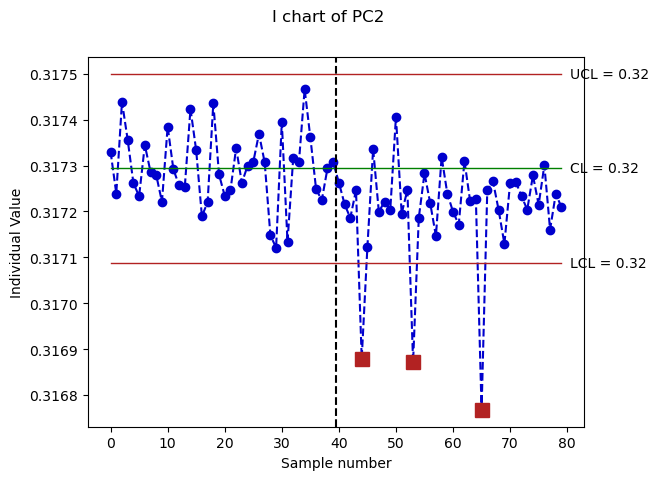

In [221]:
# PC2 Chart

part_dataset_prova['PC2'] = part_dataset_prova['PC2'] + 10
part_dataset_prova['PC2'] = stats.boxcox(part_dataset_prova['PC2'], lmbda=lmbda)
pca_second_component_df = pd.DataFrame(pca_second_component, columns=['pca_second_component'])
pca_second_component_df['PC2'] = pca_second_component_df['pca_second_component']
pc2_column_df = part_dataset_prova[['PC2']]
cc_df_pc2 = pd.concat([pca_second_component_df, pc2_column_df], axis=0)
cc_df_pc2.drop(columns=['pca_second_component'], inplace=True)
cc_df_pc2.reset_index(drop=True, inplace=True)
data_IMR_pc2_part = qda.ControlCharts.IMR(cc_df_pc2, col_name='PC2', K=2.5, subset_size=40, mr = False)

Having done a BoxCox on the previously not-normal 2nd component, using K = 2.5 it does find 3 actually damaged pieces

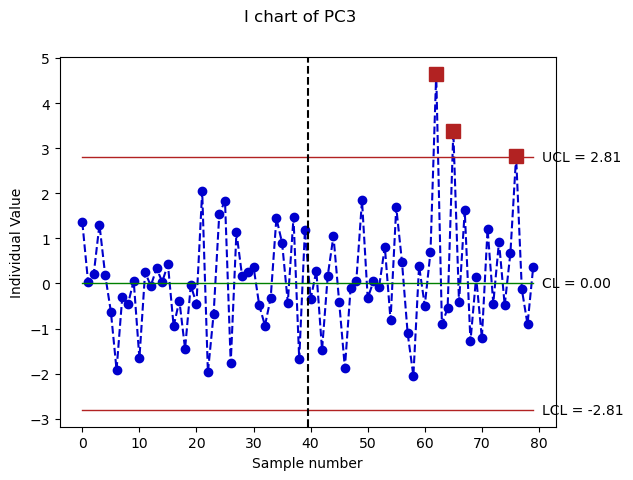

In [222]:
# PC3 Chart

pca_third_component_df = pd.DataFrame(pca_third_component, columns=['pca_third_component'])
pca_third_component_df['PC3'] = pca_third_component_df['pca_third_component']
pc3_column_df = part_dataset_prova[['PC3']]
cc_df_pc3 = pd.concat([pca_third_component_df, pc3_column_df], axis=0)
cc_df_pc3.drop(columns=['pca_third_component'], inplace=True)
cc_df_pc3.reset_index(drop=True, inplace=True)
data_IMR_pc3_part = qda.ControlCharts.IMR(cc_df_pc3, col_name='PC3', K=2.5, subset_size=40, mr = False)

## Control Chart On The Voids

In [223]:
void_dataset = void_dataset.groupby(['Image name', 'Position']).apply(lambda x: x.nlargest(30, 'Area [pixels]')).reset_index(drop=True)
void_dataset_new = void_dataset_new.groupby(['Image name', 'Position']).apply(lambda x: x.nlargest(30, 'Area [pixels]')).reset_index(drop=True)

In [224]:
# Calculate mean and std for each piece (old dataset)

stats_df = void_dataset.groupby(['Image name', 'Position']).agg(
    area_mean=('Area [pixels]', 'mean'),
    area_std=('Area [pixels]', 'std'),
    eccentricity_mean=('Eccentricity', 'mean'),
    eccentricity_std=('Eccentricity', 'std'),
    solidity_mean=('Solidity', 'mean'),
    solidity_std=('Solidity', 'std'),
    perimeter_mean=('Perimeter [pixels]','mean'),
    perimeter_std=('Perimeter [pixels]','std'),
    extent_mean=('Extent','mean'),
    extent_std=('Extent','std'),
    major_axis_length_mean=('Major Axis Length [pixels]','mean'),
    major_axis_length_std=('Major Axis Length [pixels]','std'),
    minor_axis_length_mean=('Minor Axis Length [pixels]','mean'),
    minor_axis_length_std=('Minor Axis Length [pixels]','std'),
    equivalent_diameter_mean=('Equivalent Diameter [pixels]','mean'),
    equivalent_diameter_std=('Equivalent Diameter [pixels]','std'),
    orientation_mean=('Orientation [radians]', 'mean'),
    orientation_std=('Orientation [radians]', 'std'),
).reset_index()

# Merge the statistics with the first dataset
merged_df = pd.merge(part_dataset, stats_df, on=['Image name', 'Position'], how='left')

In [225]:
# Calculate mean and std for each piece (new dataset)

stats_df_new = void_dataset_new.groupby(['Image name', 'Position']).agg(
    area_mean=('Area [pixels]', 'mean'),
    area_std=('Area [pixels]', 'std'),
    eccentricity_mean=('Eccentricity', 'mean'),
    eccentricity_std=('Eccentricity', 'std'),
    solidity_mean=('Solidity', 'mean'),
    solidity_std=('Solidity', 'std'),
    perimeter_mean=('Perimeter [pixels]','mean'),
    perimeter_std=('Perimeter [pixels]','std'),
    extent_mean=('Extent','mean'),
    extent_std=('Extent','std'),
    major_axis_length_mean=('Major Axis Length [pixels]','mean'),
    major_axis_length_std=('Major Axis Length [pixels]','std'),
    minor_axis_length_mean=('Minor Axis Length [pixels]','mean'),
    minor_axis_length_std=('Minor Axis Length [pixels]','std'),
    equivalent_diameter_mean=('Equivalent Diameter [pixels]','mean'),
    equivalent_diameter_std=('Equivalent Diameter [pixels]','std'),
    orientation_mean=('Orientation [radians]', 'mean'),
    orientation_std=('Orientation [radians]', 'std')
).reset_index()

# Merge the statistics with the first dataset
merged_df_new = pd.merge(part_dataset_new, stats_df_new, on=['Image name', 'Position'], how='left')

In [226]:
# Select the features for PCA (excluding non-numeric columns like 'Image name' and 'Position')
features = stats_df.drop(['Image name', 'Position'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca.fit(scaled_features)

# Transform the data onto the new PCA space
pca_data = pca.transform(scaled_features)

# You can now use pca_data for further analysis or visualization

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Access the loadings (eigenvectors)
loadings = pca.components_

Principal Component 1: 0.3725
Principal Component 2: 0.2275
Principal Component 3: 0.1788
Principal Component 4: 0.0793
Principal Component 5: 0.0547
Principal Component 6: 0.0363
Principal Component 7: 0.0230
Principal Component 8: 0.0122
Principal Component 9: 0.0075
Principal Component 10: 0.0036
Principal Component 11: 0.0020
Principal Component 12: 0.0014
Principal Component 13: 0.0007
Principal Component 14: 0.0003
Principal Component 15: 0.0001
Principal Component 16: 0.0000
Principal Component 17: 0.0000
Principal Component 18: 0.0000


In [227]:
# Extract the Principal Components

pca_first_component = pca.transform(scaled_features)[:, 0]
pca_second_component = pca.transform(scaled_features)[:, 1]  
pca_third_component = pca.transform(scaled_features)[:, 2] 
pca_fourth_component = pca.transform(scaled_features)[:, 3]
pca_fifth_component = pca.transform(scaled_features)[:, 4]

pca_first_component_loadings = loadings[0]
pca_second_component_loadings = loadings[1]
pca_third_component_loadings = loadings[2]
pca_fourth_component_loadings = loadings[3]
pca_fifth_component_loadings = loadings[4]

features_names = features.columns.tolist()
mean_values = stats_df[features_names].mean()
std_values = stats_df[features_names].std()

In [228]:
# Standardize using previous values

stats_df_prova = stats_df_new.copy()

mean_dict = mean_values.to_dict()
std_dict = std_values.to_dict()

# Allying the trasformation to the specified columns in column_names
for col in features_names:
    if col in stats_df_prova.columns:
        mean = mean_dict.get(col, 0)
        std = std_dict.get(col, 1)  # If std deviation is = 0, in order not to divide by 0, we can use a fallback (es.1)
        if std != 0:  # Only if std is not = 0
            stats_df_prova[col] = (stats_df_prova[col] - mean) / std

# Print the modified Data Frame to verify it
print(stats_df_prova)

                                           Image name      Position  \
0   2024-05-22_17-09-23-718_MV540-H@EOaAFjS1zEFNUI...   bottom_left   
1   2024-05-22_17-09-23-718_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
2   2024-05-22_17-09-23-718_MV540-H@EOaAFjS1zEFNUI...      top_left   
3   2024-05-22_17-09-23-718_MV540-H@EOaAFjS1zEFNUI...     top_right   
4   2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...   bottom_left   
5   2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
6   2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...      top_left   
7   2024-05-22_17-10-22-455_MV540-H@EOaAFjS1zEFNUI...     top_right   
8   2024-05-22_17-12-18-952_MV540-H@EOaAFjS1zEFNUI...   bottom_left   
9   2024-05-22_17-12-18-952_MV540-H@EOaAFjS1zEFNUI...  bottom_right   
10  2024-05-22_17-12-18-952_MV540-H@EOaAFjS1zEFNUI...      top_left   
11  2024-05-22_17-12-18-952_MV540-H@EOaAFjS1zEFNUI...     top_right   
12  2024-05-22_17-15-03-265_MV540-H@EOaAFjS1zEFNUI...   bottom_left   
13  20

In [229]:
# Adding columns for PC1, PC2, PC3 and PC4
pca_first_component_loadings = np.array(pca_first_component_loadings)
pca_second_component_loadings = np.array(pca_second_component_loadings)
pca_third_component_loadings = np.array(pca_third_component_loadings)
pca_fourth_component_loadings = np.array(pca_fourth_component_loadings)

assert len(features_names) == len(pca_first_component_loadings) == len(pca_second_component_loadings) == len(pca_third_component_loadings), "Mismatch in the length of features and PCA loadings"

# Calculating PC1, PC2, PC3, PC4 and PC5
stats_df_prova['PC1'] = stats_df_prova[features_names].dot(pca_first_component_loadings)
stats_df_prova['PC2'] = stats_df_prova[features_names].dot(pca_second_component_loadings)
stats_df_prova['PC3'] = stats_df_prova[features_names].dot(pca_third_component_loadings)
stats_df_prova['PC4'] = stats_df_prova[features_names].dot(pca_fourth_component_loadings)

In [230]:
# Normality test

import matplotlib.pyplot as plt
stat_shapiro, p_shapiro = stats.shapiro(pca_first_component)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro, p_shapiro))

stat_shapiro, p_shapiro = stats.shapiro(pca_second_component)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro, p_shapiro))

stat_shapiro, p_shapiro = stats.shapiro(pca_third_component)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro, p_shapiro))

stat_shapiro, p_shapiro = stats.shapiro(pca_fourth_component)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro, p_shapiro))

Statistic = 0.967, p-val = 0.297
Statistic = 0.950, p-val = 0.074
Statistic = 0.962, p-val = 0.200
Statistic = 0.975, p-val = 0.515


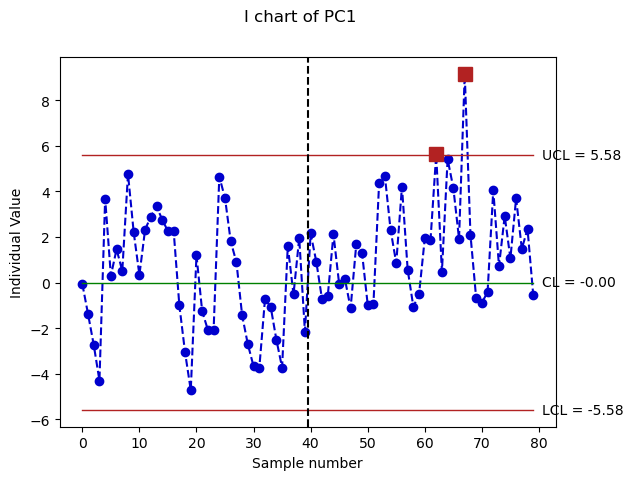

In [231]:
# PC1 Chart

pca_first_component_df = pd.DataFrame(pca_first_component, columns=['pca_first_component'])
pca_first_component_df['PC1'] = pca_first_component_df['pca_first_component']
pc1_column_df = stats_df_prova[['PC1']]
cc_df_pc1 = pd.concat([pca_first_component_df, pc1_column_df], axis=0)
cc_df_pc1.drop(columns=['pca_first_component'], inplace=True)
cc_df_pc1.reset_index(drop=True, inplace=True)
data_IMR_pc1_void = qda.ControlCharts.IMR(cc_df_pc1, col_name='PC1', subset_size=40, mr = False)

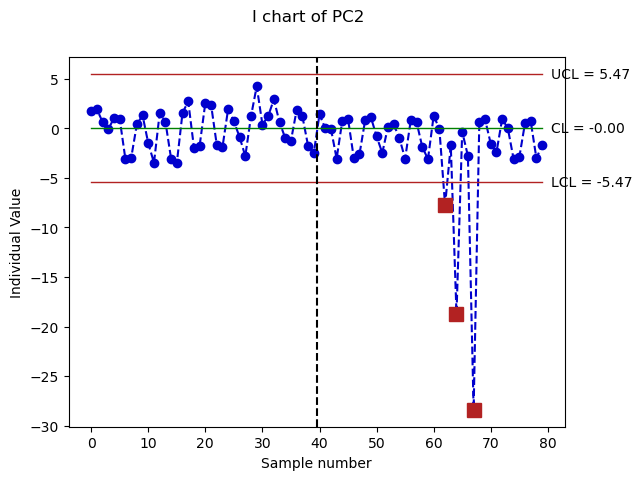

In [232]:
# PC2 Chart

pca_second_component_df = pd.DataFrame(pca_second_component, columns=['pca_second_component'])
pca_second_component_df['PC2'] = pca_second_component_df['pca_second_component']
pc2_column_df = stats_df_prova[['PC2']]
cc_df_pc2 = pd.concat([pca_second_component_df, pc2_column_df], axis=0)
cc_df_pc2.drop(columns=['pca_second_component'], inplace=True)
cc_df_pc2.reset_index(drop=True, inplace=True)
data_IMR_pc2_void = qda.ControlCharts.IMR(cc_df_pc2, col_name='PC2', subset_size=40, mr = False)

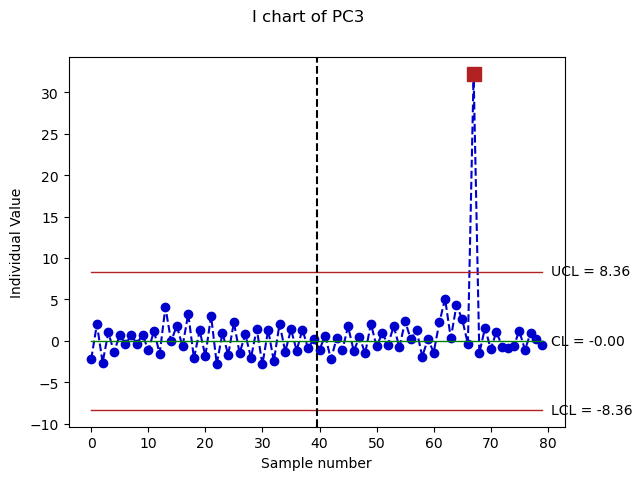

In [233]:
# PC3 Chart

pca_third_component_df = pd.DataFrame(pca_third_component, columns=['pca_third_component'])
pca_third_component_df['PC3'] = pca_third_component_df['pca_third_component']
pc3_column_df = stats_df_prova[['PC3']]
cc_df_pc3 = pd.concat([pca_third_component_df, pc3_column_df], axis=0)
cc_df_pc3.drop(columns=['pca_third_component'], inplace=True)
cc_df_pc3.reset_index(drop=True, inplace=True)
data_IMR_pc3_void = qda.ControlCharts.IMR(cc_df_pc3, col_name='PC3', subset_size=40, mr = False)

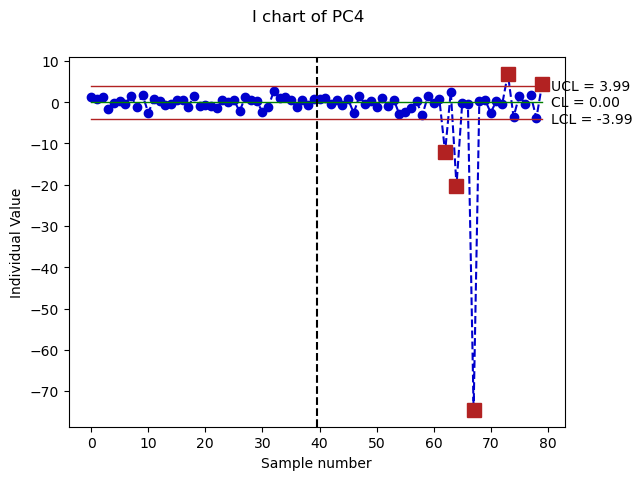

In [234]:
# PC4 Chart

pca_fourth_component_df = pd.DataFrame(pca_fourth_component, columns=['pca_fourth_component'])
pca_fourth_component_df['PC4'] = pca_fourth_component_df['pca_fourth_component']
pc4_column_df = stats_df_prova[['PC4']]
cc_df_pc4 = pd.concat([pca_fourth_component_df, pc4_column_df], axis=0)
cc_df_pc4.drop(columns=['pca_fourth_component'], inplace=True)
cc_df_pc4.reset_index(drop=True, inplace=True)
data_IMR_pc4_void = qda.ControlCharts.IMR(cc_df_pc4, col_name='PC4', subset_size=40, mr = False)

# Discussion

Now it’s time to analyze the control charts of the various principal components for the two methods to describe advantages and disadvantages to then propse a final solution to apply in the lab for future production. Please be aware that in the following analysis only the charts on the mean are being described, as, since there isn’t, by hypothesis, an order tied to production, range and moving range don’t have a real meaning.

## First method:

The control chart of the first PC (principal component) doesn’t show any OOC (out of control) or piece over the limit in the design phase. Same applies for the chart of the second PC. Similarly, the chart for the third PC also doesn’t show OOCs or pieces beyond the limits, except for one piece from phase 2. Analyzing it closely we could tell it was the top-right piece from picture 2024-05-22_17-17-37-754, which evidently shows a hole. This type of error in the void is due to lack of material and is perfectly in line with what the expectations for detection are in the control chart for the third PC. This since from in the loadings’ description in phase 1, it was clear that the third PC showed to put a lot of focus on the geometrical characteristic of the voids, both in mean and standard deviation. Moreover, being the most evidently damaged piece, it’s normal that it was easily detected. 


## Second Method:

### Part Ananlysis:

The control chart for the 1st PC shows 3 OOC values. This is due to the fact the K was re-moulded with the aim of improving the chart’s ability to detect fails due to faults. Moreover, the chart shows 3 OOCs. 2 of the pieces are indeed faulty, and these are relative to the voids, while the other is a false alarm. In retrospect, using K = 3 would be a more appropriate value since the loadings in this component don’t allow us to detect these failures better.

The chart for the 2nd PC doesn’t show values over the limits for phase 1, while there are 3 OOCs in phase 2, due to pieces actually faulty in the base (non-void errors). These pieces are: 2024-05-22_17-09-23-718 top-right, 2024-05-22_17-10-22-455 top-left e 2024-05-22_17-15-03-265 bottom-left.

The chart for the 3rd PC shows no OOCs in phase 1 and correctly highlights the 3 broken pieces from phase 2.



### Void Analysis:

The 1st PC control chart shows no pieces outside the limits in phase 1, while, in phase 2, shows 2 OOCs (2024-05-22_17-17-37-754 top-right, which, as previously highlighted, presents a hole, and the bottom-left piece in the same picture, which has a less evident hole).

The 2nd PC chart doesn’t show any pieces over the limits in phase 1 and shows 3 OOCs in phase 2. Two of these are the same highlighted in the first part while one refers to the top-left piece in picture 2024-05-22_17-15-57-046, that has a clearly visible hole.

The chart for the 3rd PC doesn’t highlight any OOCs for phase 1, while it does show one in phase 2, relative to one of the pieces already found in the 1st PC chart. 

The chart for the 4th PC doesn’t highlight any OOCs for phase 1, while it does show 5 in phase 2. Three of these have already been found in the 2nd PC analysis, while the other two highlight the top-right piece of picture 05-22_17-22-26-218 and the bottom-right in picture 2024-05-22_17-22-06-952. In the end every faulty piece has been identified, except for the top-right one in image 2024-05-22_17-15-03-265.




## Conclusion

In conclusion, we got the following results:
-	The first method found 0/3 fails for the parts, 0/3 fails due to the voids and 1/3 fails caused by lack of material
-	The revised method found 3/3 fails for the parts, 2/3 fails for the voids and 3/3 fails caused by lack of material 

The pre-processing for the concentration on a certain number of visible voids and the distinction in the dataset between parts and voids were the key aspect to the improvement, even if this showed the necessity of making a careful analysis of the loadings of the PCs to avoid too many false alarms. 
In general, addictive manufacturing is a technology for which charts need to have a high capacity to detect errors, even if not very evident, and at the cost of increasing the number of false alarms. If, on the contrary, one were to analyze a serial production with more evident faults, a more prudent approach, like the first method, might be advisable. 

 